# Experimental Data (Testing)

In [2]:
from torch import nn
import torch.nn.functional as F
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gc
from torch.optim.lr_scheduler import StepLR
import torchvision as tv
import timm
device='cuda'

In [3]:
def interpolate_vectors(vector, target_length):
    current_length = len(vector)
    # Create a new x-axis with the desired length
    new_x = np.linspace(0, current_length - 1, target_length)
    # Create the old x-axis based on the current length
    old_x = np.arange(current_length)
    # Perform linear interpolation
    interpolated_vector = np.interp(new_x, old_x, vector)
    return interpolated_vector

In [ ]:
import cv2
import os

def images_to_video(base_dir, output_path, fps=7):
    # Get a list of image file names in the base directory
    image_files = [f for f in os.listdir(base_dir) if f.endswith((".jpg", ".jpeg", ".png"))]
    
    # Sort the image files alphanumerically
    image_files = sorted(image_files, key=lambda x: int(x[4:-4]))
    
    # Read the first image to get the frame size
    first_image_path = os.path.join(base_dir, image_files[0])
    first_frame = cv2.imread(first_image_path)
    height, width, _ = first_frame.shape
    
    # Define the video writer object
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    video_writer = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
    # Iterate over the image files and write them as frames to the video
    for image_file in image_files:
        image_path = os.path.join(base_dir, image_file)
        frame = cv2.imread(image_path)
        video_writer.write(frame)
    
    # Release the video writer
    video_writer.release()
    
    print(f"Video saved as {output_path}")
    
base='test_sims/test16/'
output='videos/test16.mp4'

images_to_video(base, output)

In [4]:
import os
base='test_sims/test16/'
image_files = [f for f in os.listdir(base) if f.endswith((".jpg", ".jpeg", ".png"))]
sorted_frames = sorted(image_files, key=lambda x: int(x[4:-4]))
    # Sort the image files alphanumerically
sorted_frames

['Fig_1.jpg',
 'Fig_2.jpg',
 'Fig_3.jpg',
 'Fig_4.jpg',
 'Fig_5.jpg',
 'Fig_6.jpg',
 'Fig_7.jpg',
 'Fig_8.jpg',
 'Fig_9.jpg',
 'Fig_10.jpg',
 'Fig_11.jpg',
 'Fig_12.jpg',
 'Fig_13.jpg',
 'Fig_14.jpg',
 'Fig_15.jpg',
 'Fig_16.jpg',
 'Fig_17.jpg',
 'Fig_18.jpg',
 'Fig_19.jpg',
 'Fig_20.jpg',
 'Fig_21.jpg',
 'Fig_22.jpg',
 'Fig_23.jpg',
 'Fig_24.jpg',
 'Fig_25.jpg',
 'Fig_26.jpg',
 'Fig_27.jpg',
 'Fig_28.jpg',
 'Fig_29.jpg',
 'Fig_30.jpg',
 'Fig_31.jpg',
 'Fig_32.jpg',
 'Fig_33.jpg',
 'Fig_34.jpg',
 'Fig_35.jpg',
 'Fig_36.jpg',
 'Fig_37.jpg',
 'Fig_38.jpg',
 'Fig_39.jpg',
 'Fig_40.jpg']

In [6]:
base='test_sims_homo/2000part_16xspeed/'
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
files=os.listdir(base)

full_files=[]
sorted_frames = sorted(files, key=lambda x: int(x[4:-4]))
for i in range(len(sorted_frames)):
    file = base+sorted_frames[i]
    full_files.append(file)

In [7]:
full_files

['test_sims_homo/2000part_16xspeed/Fig_1.jpg',
 'test_sims_homo/2000part_16xspeed/Fig_2.jpg',
 'test_sims_homo/2000part_16xspeed/Fig_3.jpg',
 'test_sims_homo/2000part_16xspeed/Fig_4.jpg',
 'test_sims_homo/2000part_16xspeed/Fig_5.jpg',
 'test_sims_homo/2000part_16xspeed/Fig_6.jpg',
 'test_sims_homo/2000part_16xspeed/Fig_7.jpg',
 'test_sims_homo/2000part_16xspeed/Fig_8.jpg',
 'test_sims_homo/2000part_16xspeed/Fig_9.jpg',
 'test_sims_homo/2000part_16xspeed/Fig_10.jpg',
 'test_sims_homo/2000part_16xspeed/Fig_11.jpg',
 'test_sims_homo/2000part_16xspeed/Fig_12.jpg',
 'test_sims_homo/2000part_16xspeed/Fig_13.jpg',
 'test_sims_homo/2000part_16xspeed/Fig_14.jpg',
 'test_sims_homo/2000part_16xspeed/Fig_15.jpg',
 'test_sims_homo/2000part_16xspeed/Fig_16.jpg',
 'test_sims_homo/2000part_16xspeed/Fig_17.jpg',
 'test_sims_homo/2000part_16xspeed/Fig_18.jpg',
 'test_sims_homo/2000part_16xspeed/Fig_19.jpg',
 'test_sims_homo/2000part_16xspeed/Fig_20.jpg',
 'test_sims_homo/2000part_16xspeed/Fig_21.jpg',
 

In [9]:
#torch.cuda.empty_cache()
import gc
gc.collect()


0

In [11]:
sim_dir = os.listdir('test_sims')
file_dir = os.listdir('test_traj_files')
# Custom sorting key function
def sort_key(item):
    if '_brown' in item:
        return (1, int(item[3:-6]))
    elif 'straight' in item:
        return (2, int(item[3:-9]))
    elif 'blank' in item:
        return (3, int(item[3:-6]))
    else:
        return (0, int(item[4:]))

# Sort the list using the custom key
sorted_sim_dir = sorted(sim_dir, key=sort_key)
#sorted_sim_dir=sorted_sim_dir[0:200]
print(sorted_sim_dir)

['test1', 'test2', 'test3', 'test4', 'test5', 'test6', 'test7', 'test8', 'test9', 'test10', 'test11', 'test12', 'test13', 'test14', 'test15', 'test16', 'test17', 'test18', 'test19', 'test20', 'test21', 'test22', 'test23', 'test24']


In [14]:
def sort_key2(item):
    if '_brown' in item:
        return (1, int(item[6:-10]))
    elif 'straight' in item:
        return (2, int(item[6:-13]))
    elif 'blank' in item:
        return (3, int(item[6:-10])) # Extract the numeric part for files with '_brown'
    else:
        return (0, int(item[7:-4]))  # Extract the numeric part for files without '_brown'

# Sort the list using the custom key
sorted_file_dir = sorted(file_dir, key=sort_key2)

# Split the sorted list into 'yc_' and 'xc_' files
yc_files = [f for f in sorted_file_dir if f.startswith('yc_')]
xc_files = [f for f in sorted_file_dir if f.startswith('xc_')]

# Create a list of lists with corresponding 'yc_' and 'xc_' files
sorted_file_pairs = [[yc, xc] for yc, xc in zip(yc_files, xc_files)]

#sorted_file_pairs=sorted_file_pairs[0:200]
print(sorted_file_pairs)

[['yc_test1.csv', 'xc_test1.csv'], ['yc_test2.csv', 'xc_test2.csv'], ['yc_test3.csv', 'xc_test3.csv'], ['yc_test4.csv', 'xc_test4.csv'], ['yc_test5.csv', 'xc_test5.csv'], ['yc_test6.csv', 'xc_test6.csv'], ['yc_test7.csv', 'xc_test7.csv'], ['yc_test8.csv', 'xc_test8.csv'], ['yc_test9.csv', 'xc_test9.csv'], ['yc_test10.csv', 'xc_test10.csv'], ['yc_test11.csv', 'xc_test11.csv'], ['yc_test12.csv', 'xc_test12.csv'], ['yc_test13.csv', 'xc_test13.csv'], ['yc_test14.csv', 'xc_test14.csv'], ['yc_test15.csv', 'xc_test15.csv'], ['yc_test16.csv', 'xc_test16.csv'], ['yc_test17.csv', 'xc_test17.csv'], ['yc_test18.csv', 'xc_test18.csv'], ['yc_test19.csv', 'xc_test19.csv'], ['yc_test20.csv', 'xc_test20.csv'], ['yc_test21.csv', 'xc_test21.csv'], ['yc_test22.csv', 'xc_test22.csv'], ['yc_test23.csv', 'xc_test23.csv'], ['yc_test24.csv', 'xc_test24.csv']]


# Load Test Images

In [26]:
import pandas as pd
import numpy as np
import cv2
import os
import torch
import re
import matplotlib.pyplot as plt
from scipy.stats import exponweib,lognorm

def interpolate_vectors(vector, target_length):
    current_length = len(vector)
    # Create a new x-axis with the desired length
    new_x = np.linspace(0, current_length - 1, target_length)
    # Create the old x-axis based on the current length
    old_x = np.arange(current_length)
    # Perform linear interpolation
    interpolated_vector = np.interp(new_x, old_x, vector)
    return interpolated_vector
    

base='test_traj_files/'
target_length=500
speeds = torch.zeros(len(sorted_file_pairs),target_length)
for i in range(len(sorted_file_pairs)):
    x_arr= np.array(pd.read_csv(base+sorted_file_pairs[i][1], header=None))
    y_arr= np.array(pd.read_csv(base+sorted_file_pairs[i][0], header=None))
    vx = np.diff(x_arr, axis=0)
    vy = np.diff(y_arr, axis=0)
    speed = np.sqrt(vx**2+vy**2)
    speed = np.reshape(speed, [-1])
    speed=speed[~np.isnan(speed)]
    speed = speed[speed>0]
    #speed[speed<=0]=0.0001
    speed = interpolate_vectors(np.sort(speed), target_length)
    speeds[i,:] = torch.tensor(speed)

In [6]:
full_files[0]

'test_sims/test17/Fig_1.jpg'

In [16]:
import cv2
import numpy as np
import cv2
from joblib import Parallel, delayed
l=448
from PIL import Image
import pandas as pd
import numpy as np
import cv2
import os
import torch
import re

s=448
k=40
images_train = torch.zeros(len(sorted_sim_dir),k,s, s)
images_test = torch.zeros(len(sorted_sim_dir),k,s, s)
for i in range(len(sorted_sim_dir)):
    base = 'test_sims/'+sorted_sim_dir[i]
    im_dir = os.listdir(base)
    im_dir = sorted(im_dir, key=lambda x: int(re.findall(r'\d+', x)[0]))
    for j in range(k):
        
        img= torch.tensor(cv2.resize(cv2.imread(base+'/'+im_dir[j], cv2.IMREAD_GRAYSCALE),(s,s)))
        img = (img-torch.min(img))/(torch.max(img)-torch.min(img))
        images_train[i,j,:,:] = img


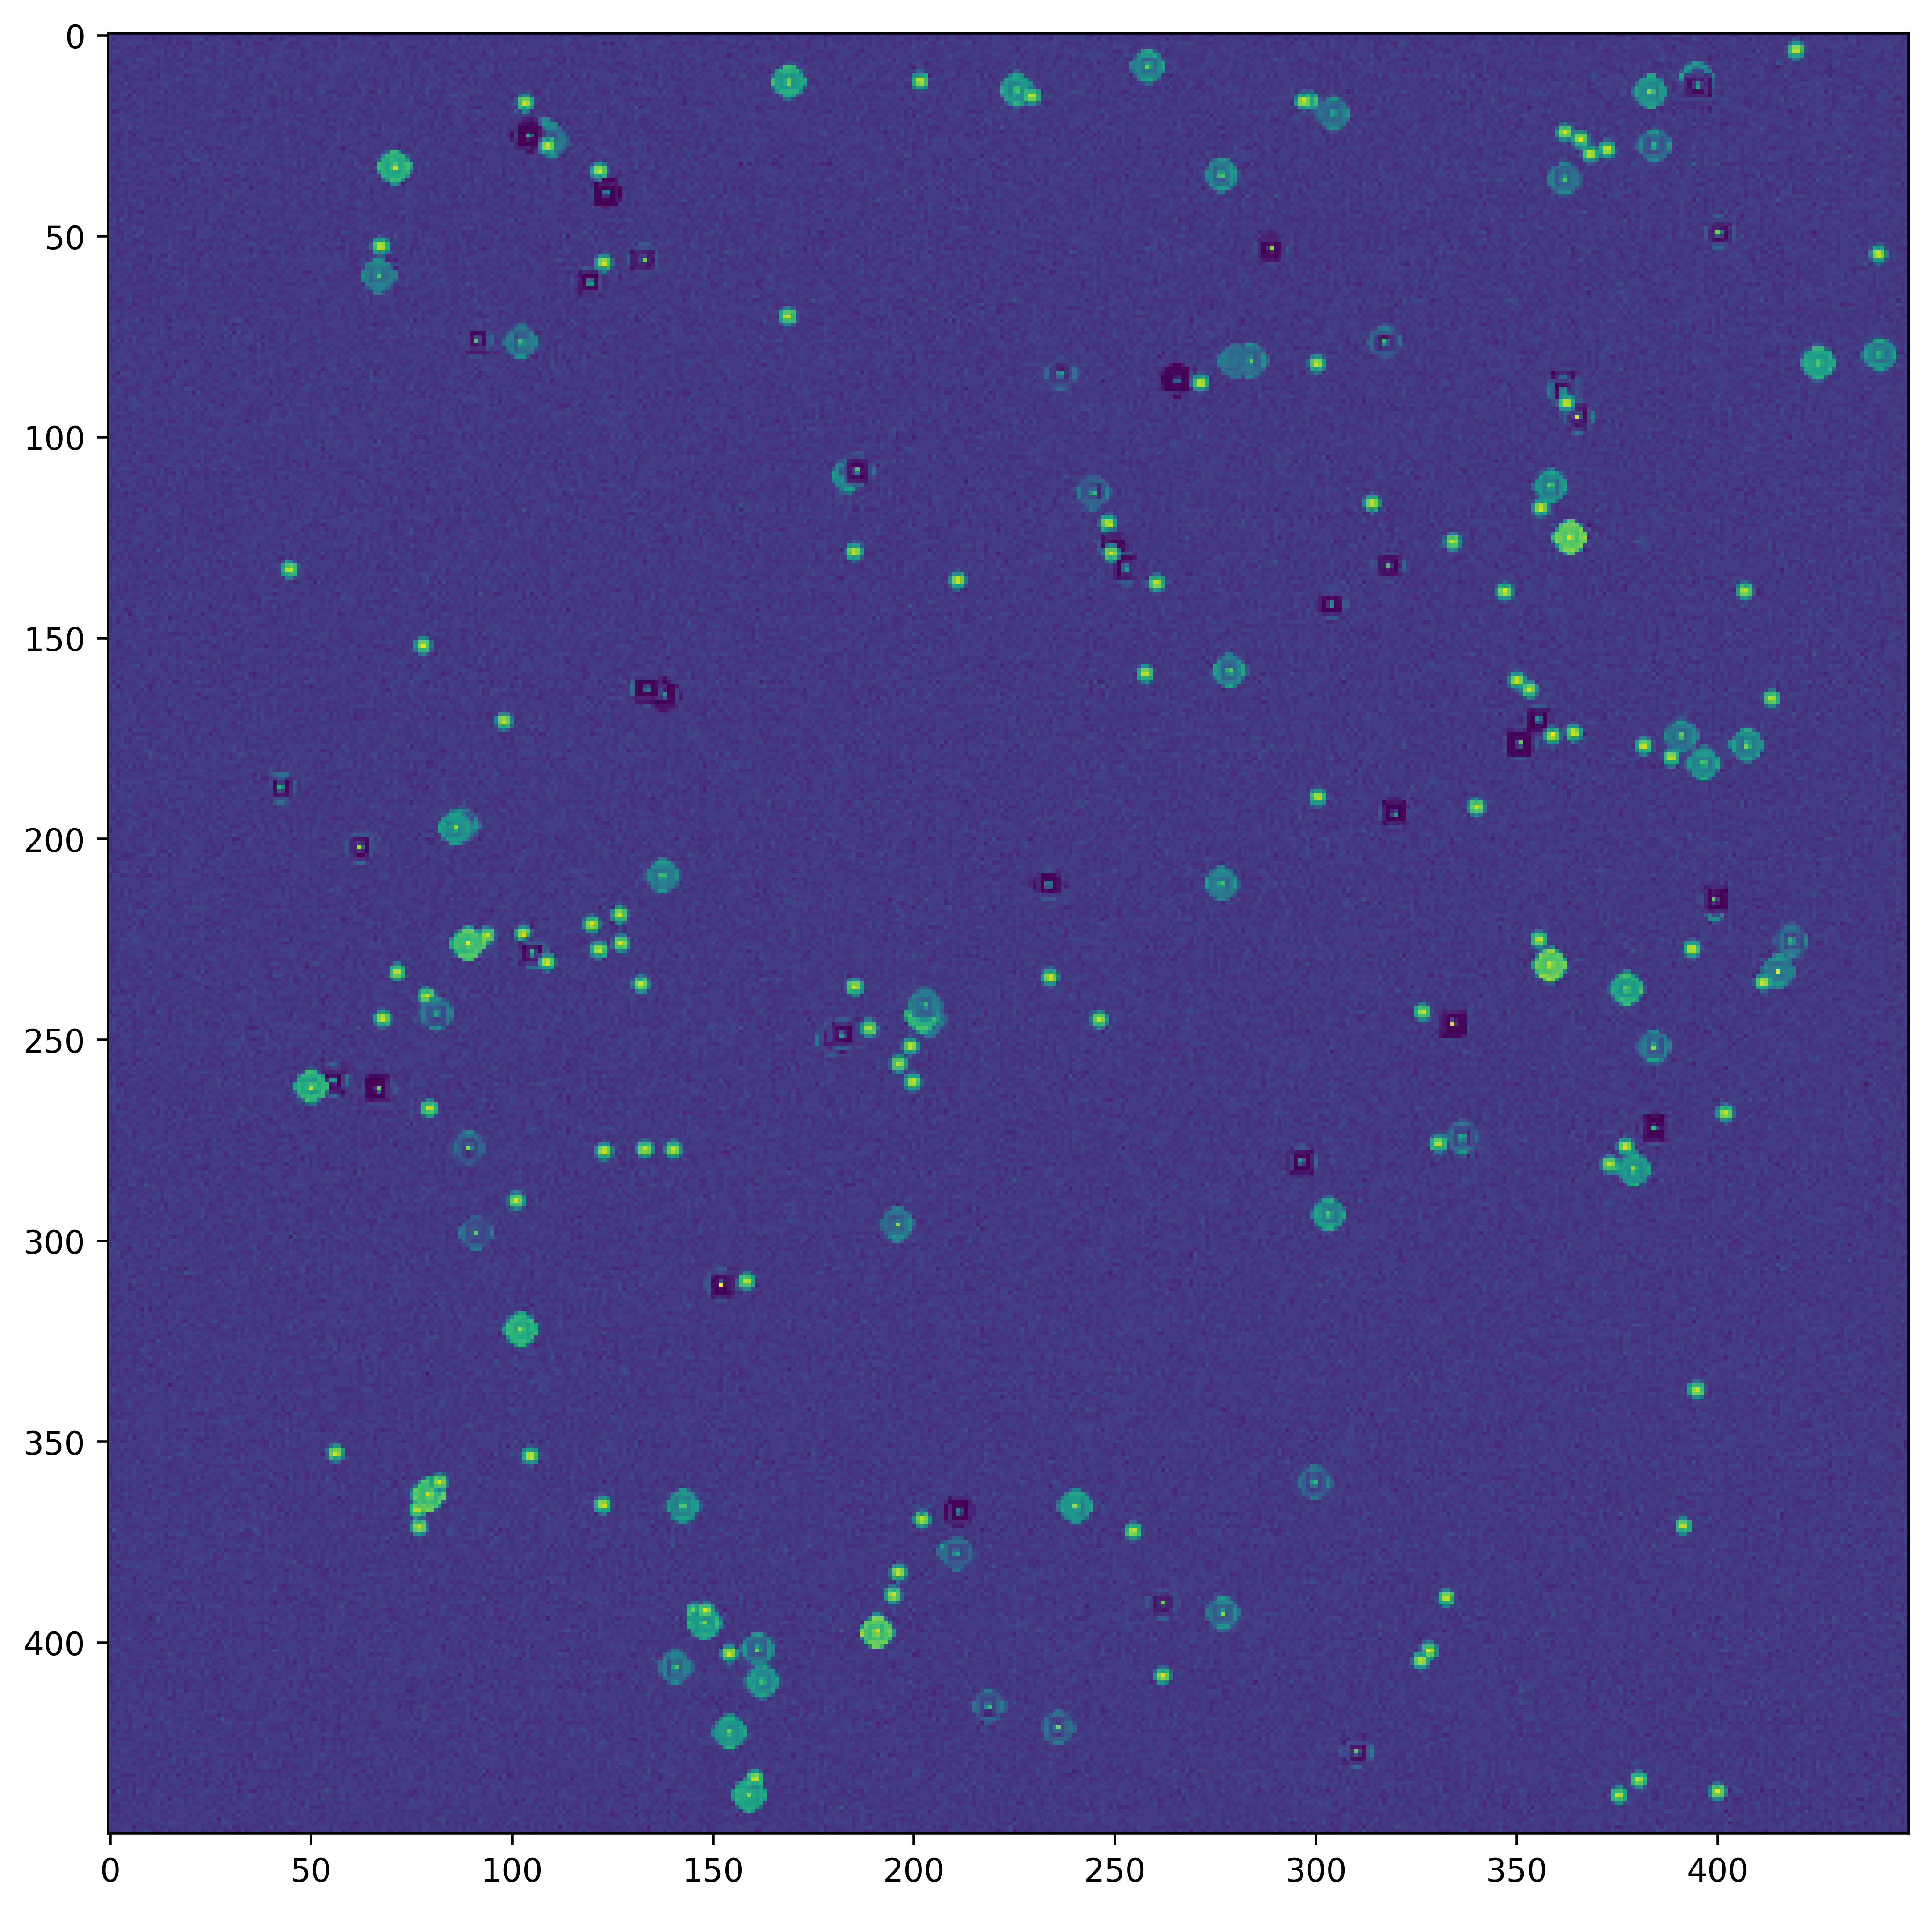

In [25]:
images_train.shape
plt.figure(figsize=(10,10),dpi=500)
plt.imshow(images_train[0,-1])


In [23]:
for i in range(len(images_train)):
    images_train[i] = 1-images_train[i]
    

In [24]:
torch.mean(images_train)

tensor(0.1886)

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gc
from torch.optim.lr_scheduler import StepLR
import torchvision as tv
import timm
device='cuda'

# model = timm.create_model('volo_d3_448', in_chans=40,drop_path_rate=.6, num_classes=500,pretrained=True)
# #model=Patch_model()
# model.to(device)
torch.cuda.empty_cache()
gc.collect()

class TestDataset(Dataset):
    def __init__(self, images, x):
        self.images = images
        self.x = x

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image = self.images[index,:,:,:]
        x = self.x[index,:]
        return image.float(), x.float()
        
class TestDataset2(Dataset):
    def __init__(self, images):
        self.images = images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image = self.images[index]

        return image.float()




In [ ]:
import torch
from torch.utils.data import DataLoader, Sampler
import numpy as np

from torch.optim.lr_scheduler import ExponentialLR

dataset = TestDataset(images_train, speeds)

batch_size = 9
torch.cuda.empty_cache()
gc.collect()

dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True,drop_last=False,num_workers=0)#,sampler=sampler)

torch.cuda.empty_cache()
gc.collect()

# Training loop
num_epochs = 300
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for im,speed in dataloader:
        optimizer.zero_grad()
        outputs = model(im.to(device))
        loss = criterion(outputs, speed.to(device))
        loss.backward()
        optimizer.step()
        scheduler.step()
        running_loss += loss.item()

    # Print the average loss for the epoch
    epoch_loss = running_loss / len(dataloader)
    model.eval()
    running_loss2=0
    with torch.no_grad():
        for im_tst,speed_tst in test_dataloader:
            outputs_tst = model(im_tst.to(device))
            loss2 = criterion(outputs_tst, speed_tst.to(device))
            running_loss2 += loss2.item()
    epoch_loss2 = running_loss2 / len(test_dataloader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.5f},  Test Loss: {epoch_loss2:.5f},Learning Rate: {optimizer.param_groups[0]['lr']:.7f}")
    torch.cuda.empty_cache()
    gc.collect()
print("Training finished!")

# Speed Models

In [13]:
images.shape

torch.Size([80, 40, 448, 448])

# Test Dataloader

In [49]:
import torch
from torch.utils.data import DataLoader, Sampler
import numpy as np

from torch.optim.lr_scheduler import ExponentialLR

dataset = TestDataset(images_train, speeds)

batch_size = 1

test_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True,drop_last=False,num_workers=0)


In [50]:
x,y = next(iter(test_dataloader))

torch.Size([1, 40, 448, 448])

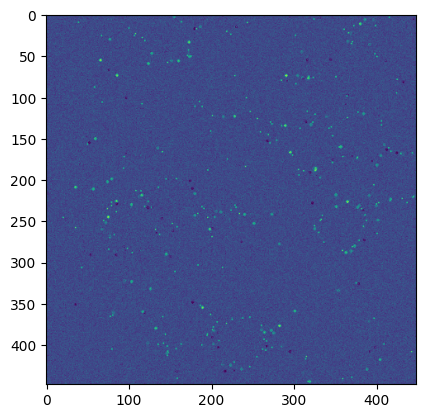

In [52]:
plt.imshow(x[0,-1])
y[0]
x.shape

# Speed Classifier

In [97]:
from torch import nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        l=200
        self.fc2=nn.Conv2d(100, l, 1, stride=2)
        #self.m1 = nn.BatchNorm1d(1000)
        self.d1 = nn.Dropout(.2)
        self.fc1=nn.Conv2d(40, 100, 1, stride=2)
        #self.m2 = nn.BatchNorm1d(l)
        self.d2 = nn.Dropout(.2)
       # self.fc2 = nn.Linear(800,l)
       # self.fc3=nn.Linear(2000,800)
       # self.fc4 = nn.Linear(800,l)
        self.fc5 = nn.Conv2d(l, 5,1, stride=1)
        #self.m3 = nn.BatchNorm1d(100)
        self.fc6 = nn.Linear(312500,1000)
        self.d3 = nn.Dropout(.2)
        self.fc7 = nn.Linear(100,4)
        self.fc8 = nn.Linear(2000,1000)

    def forward(self, x):
        b = x.shape[0]
        x = x.squeeze()
        
        l=200
        x = F.relu(self.fc1(x))
        #x = self.m1(x)
        x = self.d1(x)
        x = F.relu(self.fc2(x))
        #x = self.m2(x)
        x = self.d2(x)
        #x = x.permute(0,2,1)
        #x = F.relu(self.fc3(x))
        #x = F.relu(self.fc4(x))
        
        #x = x.view(b,l*666)
        x = F.relu(self.fc5(x))
        #x = self.m3(x)
        x = x.reshape(b, -1)
        #x = F.relu(self.fc4(x))
        x = (self.fc6(x))
        # x = self.d3(x)
        # #x = torch.flatten(x)
        # x = (self.fc8(x))
        # x = x.reshape(2,200)
        #x = self.fc7(x)
        #output = nn.functional.log_softmax(x, dim=1)
        return x

import torchvision

class Patch_model(nn.Module):
    def __init__(self):
        super(Patch_model, self).__init__()
        self.m1 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.5,num_classes=500,pretrained=True)
        self.m2 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.5,num_classes=500,pretrained=True)
        self.m3 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.5,num_classes=500,pretrained=True)
        self.m4 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.5,num_classes=500,pretrained=True)


        self.fc0=nn.Linear(2000,200)
        self.fc1=nn.Linear(200,4)
        #self.fc2=nn.Linear(1000,500)


    def forward(self, x):
        l2=224
        x1 = x[:,:,0:l2,0:l2]
        x2 = x[:,:,0:l2,l2:]
        x3 = x[:,:,l2:,0:l2]
        x4 = x[:,:,l2:,l2:]
        #torch.cuda.empty_cache()
        #gc.collect()
        #x = F.gelu(self.m0(x))
        x1 = (self.m1(x1))
        x2 = (self.m2(x2))
        x3 = (self.m3(x3))
        x4 = (self.m4(x4))
        
        #x4 = F.gelu(self.m4(x4))
        x = torch.cat([x1,x2,x3,x4],dim=1)
       # del x1,x2, x3, x4
        #x0 = F.gelu(self.fc0(x0))
        #x = torch.cat([x,x0],dim=1)#x*x0
        #x = F.gelu(self.fc0(x))
        x = F.gelu(self.fc0(x))

        x = F.softmax(self.fc1(x),dim=1)


        return x#,x2,x3,x4\


class Net7(nn.Module):
    def __init__(self):
        super(Net7, self).__init__()
        self.m1 = timm.create_model('regnetx_160.pycls_in1k', in_chans=40,drop_path_rate=0.6, num_classes=4,pretrained=True)

    def forward(self, x):
        x = F.softmax(self.m1(x),dim=1)
        return x


class Net6(nn.Module):
    def __init__(self):
        super(Net6, self).__init__()
        self.m1 = timm.create_model('regnetx_064', in_chans=40,drop_path_rate=0.4, num_classes=4,pretrained=True)

    def forward(self, x):
        x = F.softmax(self.m1(x),dim=1)
        return x
    
class Net5(nn.Module):
    def __init__(self):
        super(Net5, self).__init__()
        self.m1 = timm.create_model('densenet169', in_chans=40, num_classes=4,pretrained=True)

    def forward(self, x):
        x = F.softmax(self.m1(x),dim=1)
        return x

class Net4(nn.Module):
    def __init__(self):
        super(Net4, self).__init__()
        self.m1 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.9,num_classes=4,pretrained=True)

    def forward(self, x):
        x = F.softmax(self.m1(x),dim=1)
        return x
        
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.m1 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=0.6,num_classes=3,pretrained=True)

    def forward(self, x):
        x = F.softmax(self.m1(x),dim=1)
        return x
    
class Net0(nn.Module):
    def __init__(self):
        super(Net0, self).__init__()
        self.m1 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=0.8,num_classes=4,pretrained=True)

    def forward(self, x):
        x = F.softmax(self.m1(x),dim=1)
        return x

class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.m1 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=0.6,num_classes=4,pretrained=True)

    def forward(self, x):
        x = F.softmax(self.m1(x),dim=1)
        return x
    
class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        l=80

        self.fc1=nn.Linear(1000,l)
        self.d1 = nn.Dropout(.1)
        self.fc2=nn.Linear(1000,l)
        self.d2 = nn.Dropout(.1)
        self.fc3 = nn.Linear(40*l*l,1000)
        self.d3 = nn.Dropout(.1)
        self.fc4 = nn.Linear(1000,250)
        self.fc4_2 = nn.Linear(250,1000)
#         self.fc4_3 = nn.Linear(800,300)
#         self.fc5 = nn.Linear(300,30)
# #         self.fc5_2 = nn.Linear(200,100)
# #         self.fc5_3 = nn.Linear(100,30)
#         self.fc6 = nn.Linear(30,3)

    def forward(self, x):
        b = x.shape[0]
        x = F.relu(self.fc1(x))
        x = self.d1(x)
        x = x.permute(0,1,3,2)
        x = F.relu(self.fc2(x))
        x = self.d2(x)
        x = torch.reshape(x, [b,-1])
        x = F.relu(self.fc3(x))
        x = self.d3(x)
        x = F.relu(self.fc4(x))
        #x = torch.reshape(x, [b,10000])
        x = (self.fc4_2(x))
#         x = F.rrelu(self.fc4_3(x))
#         x = F.rrelu(self.fc5(x))
# #         x = F.rrelu(self.fc5_2(x))
# #         x = F.rrelu(self.fc5_3(x))
#         x = self.fc6(x)
        #x = torch.reshape(x, [b,2,100])
        #x = self.fc7(x)
        #output = nn.functional.log_softmax(x, dim=1)
        return x

In [98]:
model9 = Net0()
model9.load_state_dict(torch.load('models/speed_classifier_volod3_448px_disp200'))
model9.to(device).eval()



model15 = Net7()
model15.load_state_dict(torch.load('models/speed_classifier_regnetx120_500px_disp_all'))
model15.to(device).eval()
    


model21 = Net4()
model21.load_state_dict(torch.load('models/speed_classifier_volod1_224px_disp_all'))
model21.to(device).eval()


Net4(
  (m1): VOLO(
    (patch_embed): PatchEmbed(
      (conv): Sequential(
        (0): Conv2d(40, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
        (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (8): ReLU(inplace=True)
      )
      (proj): Conv2d(64, 192, kernel_size=(4, 4), stride=(4, 4))
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (network): ModuleList(
      (0): Sequential(
        (0): Outlooker(
          (norm1): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
   

In [99]:
model9.eval()

model15.eval()

model21.eval()
# model9.eval()
# # model10.eval()
# model11.eval()
import torchvision
outputs_class=[]

with torch.no_grad():
    for x,y in test_dataloader:
        x1 = torchvision.transforms.functional.resize(x, 448)
        x2 = torchvision.transforms.functional.resize(x, 384)
        x3 = torchvision.transforms.functional.resize(x, 224)

        out9 =(model9((x).to(device)).detach().cpu().numpy())

        out15 =(model15((x).to(device)).detach().cpu().numpy())
        
        out21 =(model21((x3).to(device)).detach().cpu().numpy())

        out=(out9*27+out15*3+out21)/31

        outputs_class.append(out)

In [124]:
outputs_class[4]

array([[0.00130914, 0.02911321, 0.9336812 , 0.03589651]], dtype=float32)

In [102]:
mean_out = np.mean(np.vstack(outputs_class),0)
class_num = np.argmax(mean_out)
print(class_num)
mean_out


2


array([0.0063588 , 0.11046603, 0.7811499 , 0.10202535], dtype=float32)

In [103]:
from torch import nn
import torch.nn.functional as F

class Patch_model2(nn.Module):
    def __init__(self):
        super(Patch_model2, self).__init__()
        self.m0 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=0.0,num_classes=2000,pretrained=True)
        self.m1 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m2 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m3 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m4 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)

        self.fc1=nn.Linear(2000, 1000)
        self.fc2=nn.Linear(1000,500)


    def forward(self, x):
        l2=224
        x1 = x[:,:,0:l2,0:l2]
        x2 = x[:,:,0:l2,l2:]
        x3 = x[:,:,l2:,0:l2]
        x4 = x[:,:,l2:,l2:]
        #torch.cuda.empty_cache()
        #gc.collect()
        x = F.gelu(self.m0(x))
        x1 = F.gelu(self.m1(x1))
        x2 = F.gelu(self.m2(x2))
        x3 = F.gelu(self.m3(x3))
        x4 = F.gelu(self.m4(x4))
        x0 = torch.cat([x1,x2,x3,x4],dim=1)
        del x1,x2, x3, x4
        x = x*x0
        x = F.gelu(self.fc1(x))
        x = self.fc2(x)
        return x#,x2,x3,x4

class Patch_model3(nn.Module):
    def __init__(self):
        super(Patch_model3, self).__init__()
        self.m1 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m2 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m3 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m4 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)

        self.fc1=nn.Linear(2000, 1000)
        self.fc2=nn.Linear(1000,500)


    def forward(self, x):
        l2=224
        x1 = x[:,:,0:l2,0:l2]
        x2 = x[:,:,0:l2,l2:]
        x3 = x[:,:,l2:,0:l2]
        x4 = x[:,:,l2:,l2:]
        #torch.cuda.empty_cache()
        #gc.collect()
        x1 = F.gelu(self.m1(x1))
        x2 = F.gelu(self.m2(x2))
        x3 = F.gelu(self.m3(x3))
        x4 = F.gelu(self.m4(x4))
        x = torch.cat([x1,x2,x3,x4],dim=1)
        del x1,x2, x3, x4
        x = F.gelu(self.fc1(x))
        x = self.fc2(x)
        return x#,x2,x3,x4

class Patch_model4(nn.Module):
    def __init__(self):
        super(Patch_model4, self).__init__()
        self.m1 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m2 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m3 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m4 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)

        self.fc0=nn.Linear(2000, 500)
        #self.fc2=nn.Linear(1000,500)


    def forward(self, x):
        l2=224
        x1 = x[:,:,0:l2,0:l2]
        x2 = x[:,:,0:l2,l2:]
        x3 = x[:,:,l2:,0:l2]
        x4 = x[:,:,l2:,l2:]
        #torch.cuda.empty_cache()
        #gc.collect()
        x1 = F.gelu(self.m1(x1))
        x2 = F.gelu(self.m2(x2))
        x3 = F.gelu(self.m3(x3))
        x4 = F.gelu(self.m4(x4))
        x = torch.cat([x1,x2,x3,x4],dim=1)
        del x1,x2, x3, x4
        #x = F.gelu(self.fc1(x))
        x = self.fc0(x)
        return x#,x2,x3,x4


class Patch_model(nn.Module):
    def __init__(self):
        super(Patch_model, self).__init__()
        self.m0 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=0.0,num_classes=2000,pretrained=True)
        self.m1 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m2 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m3 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m4 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)

        self.fc1=nn.Linear(4000, 1000)
        self.fc2=nn.Linear(1000,500)


    def forward(self, x):
        l2=224
        x1 = x[:,:,0:l2,0:l2]
        x2 = x[:,:,0:l2,l2:]
        x3 = x[:,:,l2:,0:l2]
        x4 = x[:,:,l2:,l2:]
        #torch.cuda.empty_cache()
        #gc.collect()
        x = F.gelu(self.m0(x))
        x1 = F.gelu(self.m1(x1))
        x2 = F.gelu(self.m2(x2))
        x3 = F.gelu(self.m3(x3))
        x4 = F.gelu(self.m4(x4))
        x0 = torch.cat([x1,x2,x3,x4],dim=1)
        del x1,x2, x3, x4
        x = torch.cat([x,x0],dim=1)#x*x0
        x = F.gelu(self.fc1(x))
        x = self.fc2(x)
        return x#,x2,x3,x4

class Net0(nn.Module):
    def __init__(self):
        super(Net0, self).__init__()
        self.m1 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=0,num_classes=500,pretrained=True)



    def forward(self, x):
        x = self.m1(x)


        return x#,x2,x3,x4

class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.m1 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=0,num_classes=1000,pretrained=True)



    def forward(self, x):
        x = self.m1(x)


        return x#,x2,x3,x4

class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.m1 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=0,num_classes=500,pretrained=True)



    def forward(self, x):
        x = self.m1(x)


        return x#,x2,x3,x4

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gc
from torch.optim.lr_scheduler import StepLR
import torchvision as tv
import timm
device='cuda'

model6 = Patch_model3()
model6.load_state_dict(torch.load('models/speed_model_volod1_patch_4x224px_dispBrown_4_21'))
model6.to(device).eval()

model7 = Patch_model()
model7.load_state_dict(torch.load('models/speed_model_Volo224-448_dispBrown_patch_v3'))
model7.to(device).eval()

model8 =Patch_model2()
model8.load_state_dict(torch.load('models/speed_model_Volo224-448_dispBrown_patch_v1'))
model8.to(device).eval()

model17 =Patch_model4()
model17.load_state_dict(torch.load('models/speed_model_patch448px_disp300_4_23_v2'))
model17.to(device).eval()

model5 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=.0,num_classes=1000,pretrained=False)
model5.load_state_dict(torch.load('models/speed_model_volod3_448px_dispBrown_4_22_v2'))
model5.to(device).eval()

model1 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=.0,num_classes=1000,pretrained=False)
model1.load_state_dict(torch.load('models/speed_model_volod3_448px_dispBrown_4_22'))
model1.to(device).eval()

model2 = timm.create_model('twins_svt_small', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model2.load_state_dict(torch.load('models/speed_model_TwinsSvtSmall_500px_opposite_dispBrown_4_21'))
model2.to(device).eval()

model3 = timm.create_model('volo_d2_224', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model3.load_state_dict(torch.load('models/speed_model_volod1_224px_disp_4_21'))
model3.to(device).eval()

model4 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model4.load_state_dict(torch.load('models/speed_model_volod1_224px_dispBrown_4_21'))
model4.to(device).eval()

model18 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model18.load_state_dict(torch.load('models/speed_model_384px_disp300_4_23'))
model18.to(device).eval()

model19 = timm.create_model('volo_d2_384', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model19.load_state_dict(torch.load('models/speed_model_384px_disp300_4_23_v2'))
model19.to(device).eval()

model20 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model20.load_state_dict(torch.load('models/speed_model_volod3_448px_disp300_4_25'))
model20.to(device).eval()

model9 = Net0()
model9.load_state_dict(torch.load('models/speed_model_Volo384_dispBrown_full'))
model9.to(device).eval()

model10 = Net0()
model10.load_state_dict(torch.load('models/speed_model_Volo384_dispBrown_fullv2'))
model10.to(device).eval()

model11 = Net0()
model11.load_state_dict(torch.load('models/speed_model_Volo384_dispBrown_fullv3'))
model11.to(device).eval()

model12 = Net0()
model12.load_state_dict(torch.load('models/speed_model_Volo384_dispBrown_full_new_v1'))
model12.to(device).eval()

model13 = Net2()
model13.load_state_dict(torch.load('models/speed_model_Volo448_dispBrown'))
model13.to(device).eval()

model14 = Net3()
model14.load_state_dict(torch.load('models/speed_model_Volo448_dispBrown_full'))
model14.to(device).eval()

model15 = timm.create_model('swinv2_small_window16_256', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model15.load_state_dict(torch.load('models/speed_model_patch_swin_256px_dispBrown_4_23'))
model15.to(device).eval()

model16 = timm.create_model('botnet26t_256', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model16.load_state_dict(torch.load('models/speed_model_ByobNet26_256px_dispBrown_4_23'))
model16.to(device).eval()

ByobNet(
  (stem): Stem(
    (conv1): ConvNormAct(
      (conv): Conv2d(40, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNormAct2d(
        24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): ReLU(inplace=True)
      )
    )
    (conv2): ConvNormAct(
      (conv): Conv2d(24, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNormAct2d(
        32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): ReLU(inplace=True)
      )
    )
    (conv3): ConvNormAct(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNormAct2d(
        64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): ReLU(inplace=True)
      )
    )
    (pool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)


In [104]:
import torchvision
outputs=[]
outputs2=[]
labels=[] 

torch.cuda.empty_cache()
gc.collect()
def interpolate_vectors(vector, target_length):
    current_length = len(vector)
    # Create a new x-axis with the desired length
    new_x = np.linspace(0, current_length - 1, target_length)
    # Create the old x-axis based on the current length
    old_x = np.arange(current_length)
    # Perform linear interpolation
    interpolated_vector = np.interp(new_x, old_x, vector)
    return interpolated_vector
    
#model.eval()
model1.eval()
model2.eval()
model3.eval()
model4.eval()
model5.eval()
model6.eval()
model7.eval()
model8.eval()
model9.eval()
model10.eval()
model11.eval()
model12.eval()
model13.eval()
model14.eval()
model15.eval()
model16.eval()
model17.eval()
model18.eval()
model19.eval()
model20.eval()



with torch.no_grad():
    for x,y in test_dataloader:
        x=1-x
        x1 = torchvision.transforms.functional.resize(x, 448)
        x2 = torchvision.transforms.functional.resize(x, 224)
        x3 = torchvision.transforms.functional.resize(x, 384)
        x4 = torchvision.transforms.functional.resize(x, 256)
        #out1_1000 = (model1((1-x1).to(device)).detach().cpu().numpy())
        #out1 = np.zeros([batch_size,500])
        #for i in range(len(out1)):
        #    out1[i,:] = interpolate_vectors(out1_1000[i,:],500)
        out2 = np.sort(model2((x).to(device)).detach().cpu().numpy())
        out11 = np.sort(model11((x3).to(device)).detach().cpu().numpy())
        #out10 =(model10((x3).to(device)).detach().cpu().numpy())
        out9 = np.sort(model9((x3).to(device)).detach().cpu().numpy())
        out8 = np.sort(model8((x1).to(device)).detach().cpu().numpy())
        out7 =np.sort(model7((x1).to(device)).detach().cpu().numpy())
        out6 = np.sort(model6((1-x1).to(device)).detach().cpu().numpy())
        out3 = np.sort(model3((1-x2).to(device)).detach().cpu().numpy())
        out4 = np.sort(model4((x2).to(device)).detach().cpu().numpy())
        #out5 = np.sort(model5((x1).to(device)).detach().cpu().numpy())
        out12 = np.sort(model12((x3).to(device)).detach().cpu().numpy())
        #out0 = (model((1-x1).to(device)).detach().cpu().numpy())
        out13_1000 = np.sort(model13((x1).to(device)).detach().cpu().numpy())
        out13 = np.zeros([batch_size,500])
        for i in range(len(out13)):
            out13[i,:] = interpolate_vectors(out13_1000[i,:],500)
        out14 = np.sort(model14((x1).to(device)).detach().cpu().numpy())
        out15 = np.sort(model15((1-x4).to(device)).detach().cpu().numpy())
        #out16 = (model16((1-x4).to(device)).detach().cpu().numpy())
        out17 = np.sort(model17((1-x1).to(device)).detach().cpu().numpy())
        out18 = np.sort(model18((x3).to(device)).detach().cpu().numpy())
        out19 = np.sort(model19((1-x3).to(device)).detach().cpu().numpy())
        out20 = np.sort(model20((1-x1).to(device)).detach().cpu().numpy())

        out14_2 = np.sort(model14((1-x1).to(device)).detach().cpu().numpy())
        out15_2 = np.sort(model15((x4).to(device)).detach().cpu().numpy())
        #out16 = (model16((1-x4).to(device)).detach().cpu().numpy())
        out17_2 = np.sort(model17((x1).to(device)).detach().cpu().numpy())
        out18_2 = np.sort(model18((1-x3).to(device)).detach().cpu().numpy())
        out19_2 = np.sort(model19((x3).to(device)).detach().cpu().numpy())
        out20_2 = np.sort(model20((x1).to(device)).detach().cpu().numpy())
        if class_num==3:
            #1ulh
            #class 3 (x<3)
            out=(out4*6+np.sort(out14)*15+np.sort(out17_2)*20+np.sort(out18_2)*2+np.sort(out19_2)*25+np.sort(out20)*10+np.sort(out8)*2.5+np.sort(out9)*13.5)/106
        elif class_num==2:
            #class 2 (3<x<6)
            out=(out2*10+out3*4+out4*16+out6*4+out7*1+out11*10+out12*5+out13*4+out14*1+out15*2+out17*10+out18*8+out19*26+out20*2+out9*3)/95
        elif class_num==1:
            #5ulh
            #class 1 (6<x<10)
            out=(out3*8+out4*32+out8*15+out11*33+out13*50+out14*5+out18*17+out19*17+out6*5+out2*5)/156
            
        else:
            #class 0 (x>10)
            out=(out3*8+out4*64+out8*15+out11*33+out13*50+out14*5+out18*17+out19*17+out6*5+out2*10)/180

        outputs.append(out)
        labels.append(y)
        #outputs2.append(out2)


In [60]:
out = np.reshape(np.hstack(outputs),[12000 ,])
lab = np.reshape(np.hstack(labels),[12000 ,])
out = out[out>0]
lab = lab[lab>0]
out.shape

(11947,)

In [64]:
len(outputs)
labels[0]

tensor([[6.1653e-03, 6.2767e-02, 9.5213e-02, 1.2259e-01, 1.4015e-01, 1.5988e-01,
         1.7888e-01, 1.9470e-01, 2.1723e-01, 2.3000e-01, 2.5009e-01, 2.6869e-01,
         2.8293e-01, 2.9310e-01, 3.0756e-01, 3.1816e-01, 3.3698e-01, 3.4767e-01,
         3.6506e-01, 3.8098e-01, 3.9534e-01, 4.0706e-01, 4.1977e-01, 4.3094e-01,
         4.4540e-01, 4.5780e-01, 4.7120e-01, 4.8202e-01, 4.9273e-01, 5.0482e-01,
         5.1614e-01, 5.2693e-01, 5.3818e-01, 5.5115e-01, 5.6017e-01, 5.7261e-01,
         5.8282e-01, 5.9468e-01, 6.0480e-01, 6.1509e-01, 6.2739e-01, 6.3923e-01,
         6.5214e-01, 6.6548e-01, 6.7681e-01, 6.8816e-01, 6.9836e-01, 7.0995e-01,
         7.2324e-01, 7.3451e-01, 7.4562e-01, 7.5584e-01, 7.6969e-01, 7.8263e-01,
         7.9517e-01, 8.0729e-01, 8.1850e-01, 8.3146e-01, 8.4149e-01, 8.5183e-01,
         8.6170e-01, 8.7395e-01, 8.8478e-01, 8.9655e-01, 9.0461e-01, 9.1631e-01,
         9.2675e-01, 9.4328e-01, 9.5476e-01, 9.7124e-01, 9.8103e-01, 9.9323e-01,
         1.0046e+00, 1.0162e

In [125]:
sorted_sim_dir[4]

'test5'

In [126]:
print(np.mean(outputs[4]),torch.mean(labels[4]))

5.750812530198382 tensor(7.3523)


# Calculate Speeds from Experimental Particle Tracking Data

In [136]:
directory='../tmate_trajectories/'
filename = os.listdir(directory)
filename[-6]

'test1.csv'

In [93]:
images_train.shape[0]*images_train.shape[1]

960

In [137]:
directory='../tmate_trajectories/'
filename = os.listdir(directory)[-6]
print(filename)
df = pd.read_csv(os.path.join(directory,filename),header=0, skiprows=[1,2,3])
#df.Positio
tracks = df.TRACK_ID.unique()
vels=1
for i in range(len(tracks)):
    idx = tracks[i]
    posx = .325*df[df.TRACK_ID==idx].sort_values(by='FRAME').POSITION_X
    posy = .325*df[df.TRACK_ID==idx].sort_values(by='FRAME').POSITION_Y
    
    #posx[posx==0]=np.nan
    #posy[posy==0]=np.nan
    vel = (np.sqrt(posx.diff()**2+posy.diff()**2)/.12).dropna()

    vels = np.hstack([vels, vel])
        
vels=vels[~np.isnan(vels)]
vels = vels[vels<800]
vels = vels[vels>0]

test1.csv


(4e-05, 0.1)

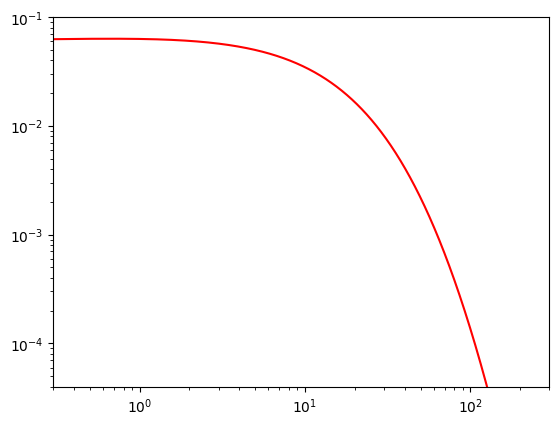

In [138]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm
#new_out=(out6*4+out2*1+out9*.5+out1*1+out10*2.5)/9
a,b,c,d= betaprime.fit(np.sort(outputs[0]*.325/.12))
xtorch= np.linspace(betaprime.ppf(0.0001, a,b,c,d),
                betaprime.ppf(0.9999, a,b,c,d), 4000)
distr_torch=betaprime.pdf(xtorch, a,b,c,d)
plt.plot(xtorch,distr_torch,c='r')
plt.xscale('log')
plt.yscale('log')
plt.xlim([3e-1,3e2])
plt.ylim([4e-5,.1])
#15, 16, 20, 9, 3, 10
#3, 4, 6, 7, 12, 13, 17, 18, 19, 20

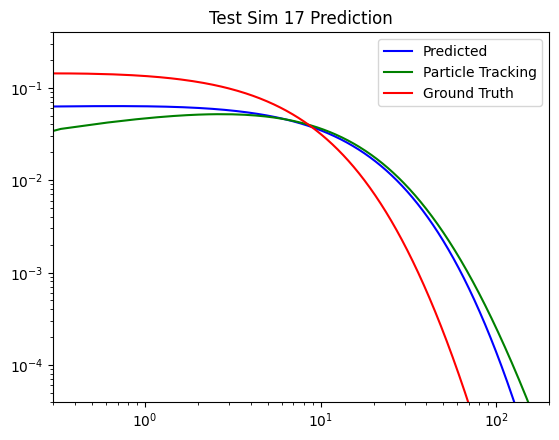

In [96]:
a,b,c,d= betaprime.fit(np.sort(vels))
xvel= np.linspace(betaprime.ppf(0.0001, a,b,c,d),
                betaprime.ppf(0.9999, a,b,c,d), 1000)
distr_vel=betaprime.pdf(xvel, a,b,c,d)

a,b,c,d= betaprime.fit(np.sort(labels[16]))
xlab= np.linspace(betaprime.ppf(0.0001, a,b,c,d),
                betaprime.ppf(0.9999, a,b,c,d), 1000)
distr_lab=betaprime.pdf(xlab, a,b,c,d)

plt.plot(xtorch,distr_torch,c='b')
plt.plot(xvel,distr_vel,c='g')
plt.plot(xlab,distr_lab,c='r')
plt.xscale('log')
plt.yscale('log')
plt.xlim([3e-1,2e2])
plt.ylim([4e-5,.4])
plt.title('Test Sim 17 Prediction')
plt.legend(['Predicted', 'Particle Tracking', 'Ground Truth'])

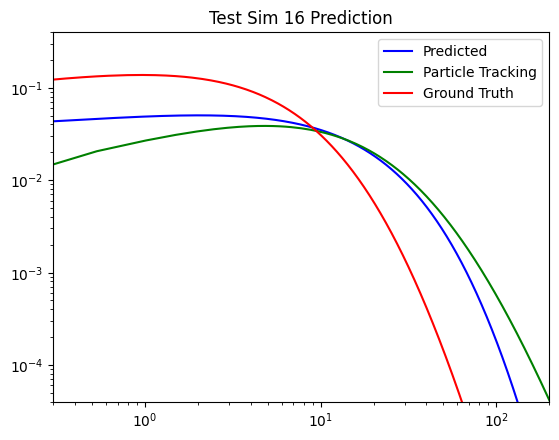

In [110]:
a,b,c,d= betaprime.fit(np.sort(vels))
xvel= np.linspace(betaprime.ppf(0.0001, a,b,c,d),
                betaprime.ppf(0.9999, a,b,c,d), 1000)
distr_vel=betaprime.pdf(xvel, a,b,c,d)

a,b,c,d= betaprime.fit(np.sort(labels[15]))
xlab= np.linspace(betaprime.ppf(0.0001, a,b,c,d),
                betaprime.ppf(0.9999, a,b,c,d), 1000)
distr_lab=betaprime.pdf(xlab, a,b,c,d)

plt.plot(xtorch,distr_torch,c='b')
plt.plot(xvel,distr_vel,c='g')
plt.plot(xlab,distr_lab,c='r')
plt.xscale('log')
plt.yscale('log')
plt.xlim([3e-1,2e2])
plt.ylim([4e-5,.4])
plt.title('Test Sim 16 Prediction')
plt.legend(['Predicted', 'Particle Tracking', 'Ground Truth'])

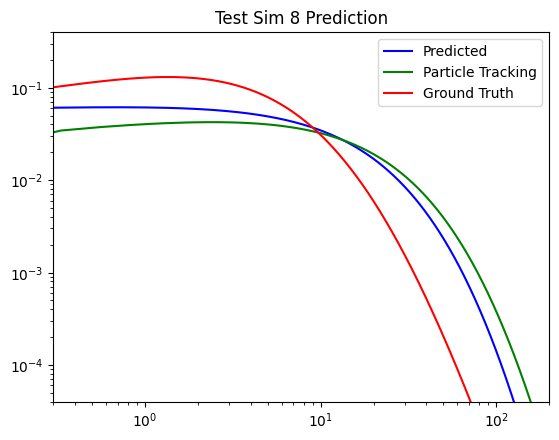

In [123]:
a,b,c,d= betaprime.fit(np.sort(vels))
xvel= np.linspace(betaprime.ppf(0.0001, a,b,c,d),
                betaprime.ppf(0.9999, a,b,c,d), 1000)
distr_vel=betaprime.pdf(xvel, a,b,c,d)

a,b,c,d= betaprime.fit(np.sort(labels[7]))
xlab= np.linspace(betaprime.ppf(0.0001, a,b,c,d),
                betaprime.ppf(0.9999, a,b,c,d), 1000)
distr_lab=betaprime.pdf(xlab, a,b,c,d)

plt.plot(xtorch,distr_torch,c='b')
plt.plot(xvel,distr_vel,c='g')
plt.plot(xlab,distr_lab,c='r')
plt.xscale('log')
plt.yscale('log')
plt.xlim([3e-1,2e2])
plt.ylim([4e-5,.4])
plt.title('Test Sim 8 Prediction')
plt.legend(['Predicted', 'Particle Tracking', 'Ground Truth'])

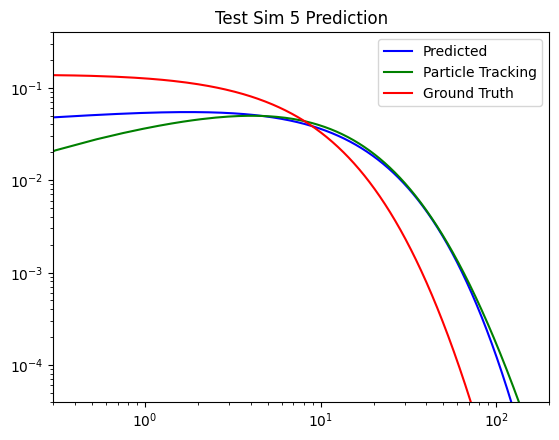

In [131]:
a,b,c,d= betaprime.fit(np.sort(vels))
xvel= np.linspace(betaprime.ppf(0.0001, a,b,c,d),
                betaprime.ppf(0.9999, a,b,c,d), 1000)
distr_vel=betaprime.pdf(xvel, a,b,c,d)

a,b,c,d= betaprime.fit(np.sort(labels[4]))
xlab= np.linspace(betaprime.ppf(0.0001, a,b,c,d),
                betaprime.ppf(0.9999, a,b,c,d), 1000)
distr_lab=betaprime.pdf(xlab, a,b,c,d)

plt.plot(xtorch,distr_torch,c='b')
plt.plot(xvel,distr_vel,c='g')
plt.plot(xlab,distr_lab,c='r')
plt.xscale('log')
plt.yscale('log')
plt.xlim([3e-1,2e2])
plt.ylim([4e-5,.4])
plt.title('Test Sim 5 Prediction')
plt.legend(['Predicted', 'Particle Tracking', 'Ground Truth'])

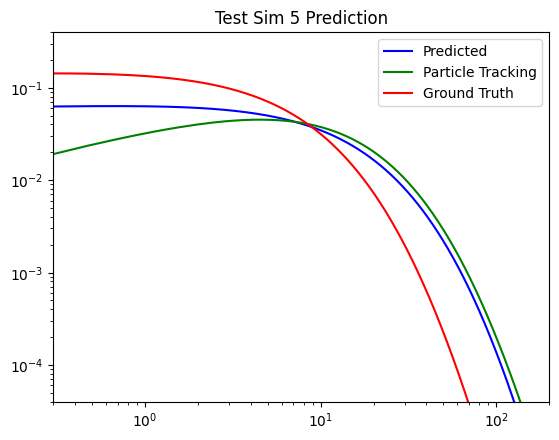

In [139]:
a,b,c,d= betaprime.fit(np.sort(vels))
xvel= np.linspace(betaprime.ppf(0.0001, a,b,c,d),
                betaprime.ppf(0.9999, a,b,c,d), 1000)
distr_vel=betaprime.pdf(xvel, a,b,c,d)

a,b,c,d= betaprime.fit(np.sort(labels[0]))
xlab= np.linspace(betaprime.ppf(0.0001, a,b,c,d),
                betaprime.ppf(0.9999, a,b,c,d), 1000)
distr_lab=betaprime.pdf(xlab, a,b,c,d)

plt.plot(xtorch,distr_torch,c='b')
plt.plot(xvel,distr_vel,c='g')
plt.plot(xlab,distr_lab,c='r')
plt.xscale('log')
plt.yscale('log')
plt.xlim([3e-1,2e2])
plt.ylim([4e-5,.4])
plt.title('Test Sim 5 Prediction')
plt.legend(['Predicted', 'Particle Tracking', 'Ground Truth'])

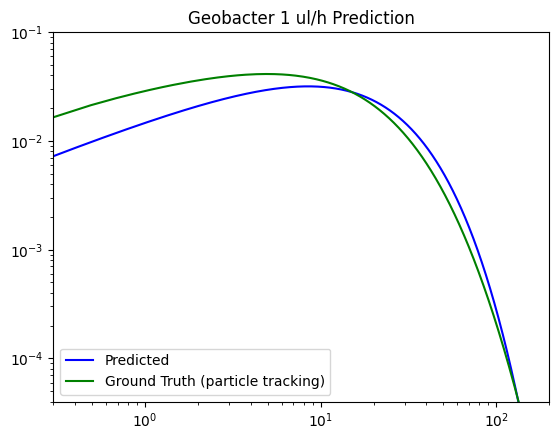

In [26]:
a,b,c,d= betaprime.fit(np.sort(vels))
xvel= np.linspace(betaprime.ppf(0.0001, a,b,c,d),
                betaprime.ppf(0.9999, a,b,c,d), 1000)
distr_vel=betaprime.pdf(xvel, a,b,c,d)
plt.plot(xtorch,distr_torch,c='b')
plt.plot(xvel,distr_vel,c='g')
plt.xscale('log')
plt.yscale('log')
plt.xlim([3e-1,2e2])
plt.ylim([4e-5,.1])
plt.title('Geobacter 1 ul/h Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

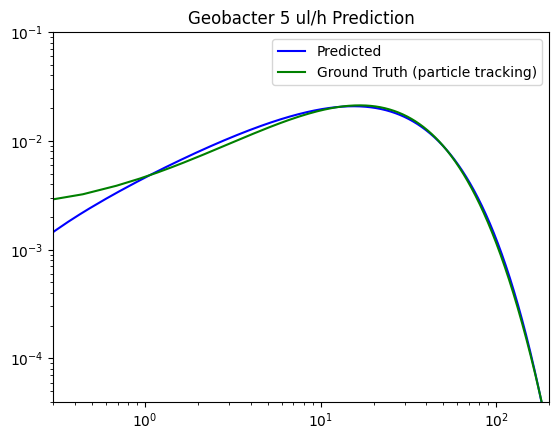

In [52]:
a,b,c,d= betaprime.fit(np.sort(vels))
xvel= np.linspace(betaprime.ppf(0.0001, a,b,c,d),
                betaprime.ppf(0.9999, a,b,c,d), 1000)
distr_vel=betaprime.pdf(xvel, a,b,c,d)
plt.plot(xtorch,distr_torch,c='b')
plt.plot(xvel,distr_vel,c='g')
plt.xscale('log')
plt.yscale('log')
plt.xlim([3e-1,2e2])
plt.ylim([4e-5,.1])
plt.title('Geobacter 5 ul/h Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

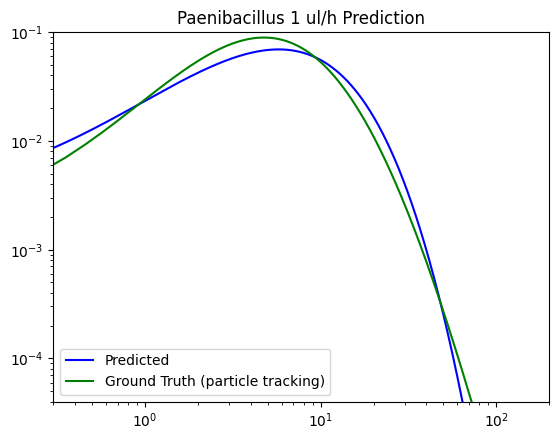

In [32]:
a,b,c,d= betaprime.fit(np.sort(vels))
xvel= np.linspace(betaprime.ppf(0.0001, a,b,c,d),
                betaprime.ppf(0.9999, a,b,c,d), 1000)
distr_vel=betaprime.pdf(xvel, a,b,c,d)
plt.plot(xtorch,distr_torch,c='b')
plt.plot(xvel,distr_vel,c='g')
plt.xscale('log')
plt.yscale('log')
plt.xlim([3e-1,2e2])
plt.ylim([4e-5,.1])
plt.title('Paenibacillus 1 ul/h Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

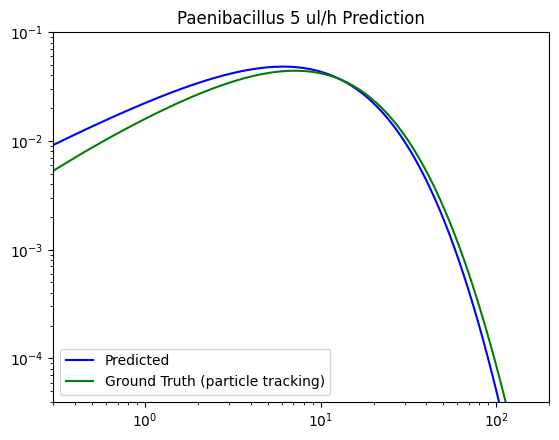

In [28]:
a,b,c,d= betaprime.fit(np.sort(vels))
xvel= np.linspace(betaprime.ppf(0.0001, a,b,c,d),
                betaprime.ppf(0.9999, a,b,c,d), 1000)
distr_vel=betaprime.pdf(xvel, a,b,c,d)
plt.plot(xtorch,distr_torch,c='b')
plt.plot(xvel,distr_vel,c='g')
plt.xscale('log')
plt.yscale('log')
plt.xlim([3e-1,2e2])
plt.ylim([4e-5,.1])
plt.title('Paenibacillus 5 ul/h Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

# Angle Model

In [29]:
def calculate_angles_test(x_arr, y_arr):
    traj_stats=[]
    x_diff = np.diff(x_arr)
    y_diff = np.diff(y_arr)
    #print(x_diff.shape)
    angles=np.zeros((len(x_diff),1))
    for i in range(len(x_diff)-1):
        theta_1=np.arctan(y_diff[i]/x_diff[i])
        theta_2=np.arctan(y_diff[i+1]/x_diff[i+1])
        angles[i]=(theta_2-theta_1)*(180/np.pi)
        traj_stats.append([angles])
    
    angles=np.abs(angles[~np.isnan(angles)])
    #angles = interpolate_vectors(np.sort(angles), target_length)
    angles[angles==0]=0.1
    return angles

In [30]:
directory='../tmate_trajectories/'
filename = os.listdir(directory)[6]
print(filename)
df = pd.read_csv(os.path.join(directory,filename),header=0, skiprows=[1,2,3])
#df.Positio
tracks = df.TRACK_ID.unique()
angles=1
for i in range(len(tracks)):
    idx = tracks[i]
    if df[df.TRACK_ID==idx].sort_values(by='FRAME').FRAME.iloc[-1] < (images.shape[0]*images.shape[1]):
        posx = df[df.TRACK_ID==idx].sort_values(by='FRAME').POSITION_X
        posy = df[df.TRACK_ID==idx].sort_values(by='FRAME').POSITION_Y

        angle_array = calculate_angles_test(np.array(posx),np.array(posy))
        
        #posx[posx==0]=np.nan
        #posy[posy==0]=np.nan
        #vel = (np.sqrt(posx.diff()**2+posy.diff()**2)/.12).dropna()
    
        angles = np.hstack([angles, angle_array])

pean_5ulh_001.csv


C:\Users\marcb\AppData\Local\Temp\ipykernel_37752\1466331465.py:9: RuntimeWarning: invalid value encountered in scalar divide
  theta_2=np.arctan(y_diff[i+1]/x_diff[i+1])
C:\Users\marcb\AppData\Local\Temp\ipykernel_37752\1466331465.py:8: RuntimeWarning: invalid value encountered in scalar divide
  theta_1=np.arctan(y_diff[i]/x_diff[i])
C:\Users\marcb\AppData\Local\Temp\ipykernel_37752\1466331465.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  theta_2=np.arctan(y_diff[i+1]/x_diff[i+1])
C:\Users\marcb\AppData\Local\Temp\ipykernel_37752\1466331465.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  theta_1=np.arctan(y_diff[i]/x_diff[i])


In [31]:
angles=np.abs(angles[~np.isnan(angles)])
angles = angles[angles>0]

In [32]:


class Net0(nn.Module):
    def __init__(self):
        super(Net0, self).__init__()
        self.m1 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=0,num_classes=500,pretrained=True)

    def forward(self, x):
        x = self.m1(x)

model0 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=0,num_classes=500,pretrained=True)
model0.load_state_dict(torch.load('models/turn_angle_model_volod3_448px_disp_all_4_25'))
model0.to(device).eval()

model1 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=0,num_classes=500,pretrained=True)
model1.load_state_dict(torch.load('models/turn_angle_model_Volod1_384_dispBrownv4'))
model1.to(device).eval()

model2 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=0,num_classes=500,pretrained=True)
model2.load_state_dict(torch.load('models/turn_angle_model_Volod1_384_dispBrownv3'))
model2.to(device).eval()

model3 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=0,num_classes=500,pretrained=True)
model3.load_state_dict(torch.load('models/turn_angle_model_Volod1_384_dispBrownv2'))
model3.to(device).eval()

model4 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=0,num_classes=500,pretrained=True)
model4.load_state_dict(torch.load('models/turn_angle_model_Volod1_384_dispBrown'))
model4.to(device).eval()

# model5 = Net()
# model5.load_state_dict(torch.load('models/turn_angle_model'))
# model5.to(device).eval()

VOLO(
  (patch_embed): PatchEmbed(
    (conv): Sequential(
      (0): Conv2d(40, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (proj): Conv2d(64, 192, kernel_size=(4, 4), stride=(4, 4))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (network): ModuleList(
    (0): Sequential(
      (0): Outlooker(
        (norm1): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
        (attn): OutlookAttention(
          (v): Linear

In [72]:
class_num

2

In [33]:
model0.eval()
model1.eval()
model2.eval()
model3.eval()
model4.eval()
# model9.eval()
# # model10.eval()
# model11.eval()
import torchvision
outputs=[]

with torch.no_grad():
    for x in test_dataloader:
        x1 = torchvision.transforms.functional.resize(x, 448)
        x2 = torchvision.transforms.functional.resize(x, 384)

        out0 =np.sort(model0((x).to(device)).detach().cpu().numpy())
        out1 =np.sort(model1((x2).to(device)).detach().cpu().numpy())*.5
        out2 =np.sort(model2((x2).to(device)).detach().cpu().numpy())*.5
        out3 =np.sort(model3((x2).to(device)).detach().cpu().numpy())*.5
        out4 =np.sort(model4((x2).to(device)).detach().cpu().numpy())*.5

        if class_num==3:
            out=(out0*4+out4*1)/5
        elif class_num==2:
            out=out1
        elif class_num==1:
            out=out0
        #out=out0
        # elif class_num==2:
        #     out=out1
        #out = (out0+out1+out2)/2

        outputs.append(out)

In [34]:
out = np.abs(np.reshape(np.hstack(outputs),[40000 ,]))
out=out[out>0]
out.shape

(40000,)

In [35]:
print(np.mean(out), np.mean(angles))

22.130316 21.963120461317764


In [36]:

class_num

2

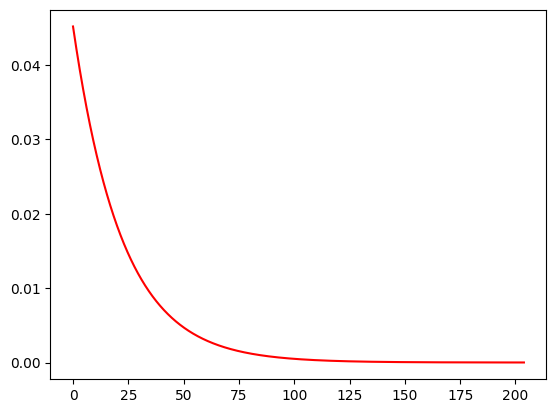

In [37]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm, expon
#new_out=(out6*4+out2*1+out9*.5+out11*1+out10*2.5)/9
a,b= expon.fit(np.sort(out))
g5xtorch= np.linspace(expon.ppf(0.0001, a,b),
                expon.ppf(0.9999, a,b), 4000)
g5distr_torch=expon.pdf(g5xtorch, a,b)
plt.plot(g5xtorch,g5distr_torch,c='r')

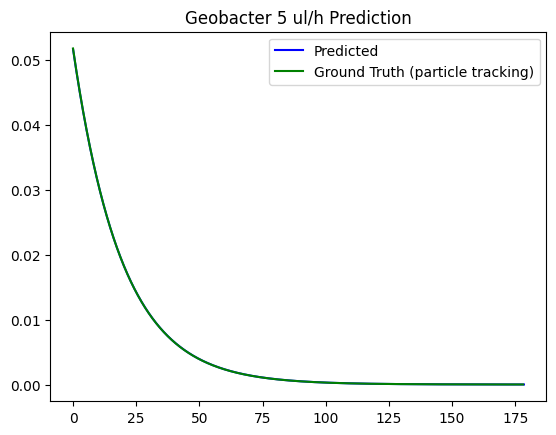

In [89]:
a,b= expon.fit(np.sort(angles))
g5xvel= np.linspace(expon.ppf(0.0001, a,b),
                expon.ppf(0.9999, a,b), 4000)
g5distr_vel=expon.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Geobacter 5 ul/h Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

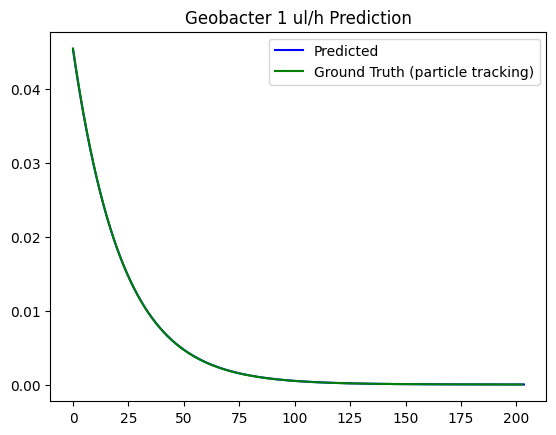

In [83]:
a,b= expon.fit(np.sort(angles))
g5xvel= np.linspace(expon.ppf(0.0001, a,b),
                expon.ppf(0.9999, a,b), 4000)
g5distr_vel=expon.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Geobacter 1 ul/h Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

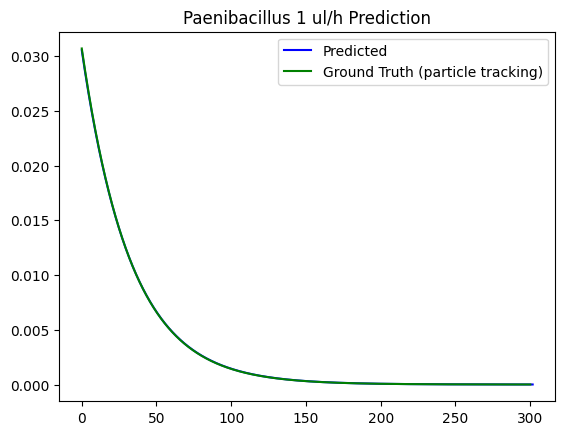

In [76]:
a,b= expon.fit(np.sort(angles))
g5xvel= np.linspace(expon.ppf(0.0001, a,b),
                expon.ppf(0.9999, a,b), 4000)
g5distr_vel=expon.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Paenibacillus 1 ul/h Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

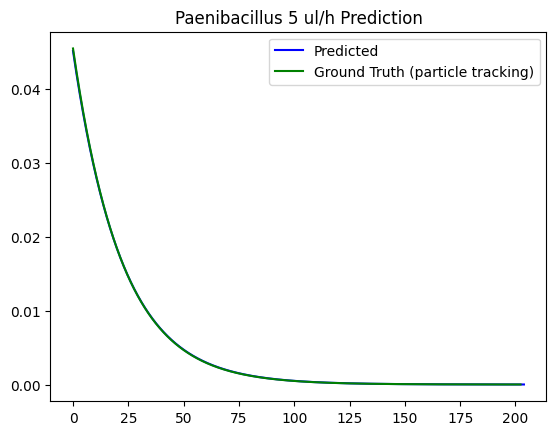

In [38]:
a,b= expon.fit(np.sort(angles))
g5xvel= np.linspace(expon.ppf(0.0001, a,b),
                expon.ppf(0.9999, a,b), 4000)
g5distr_vel=expon.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Paenibacillus 5 ul/h Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

# Velocity Model

## Vx

In [39]:
from torch import nn
import torch.nn.functional as F

class Patch_model2(nn.Module):
    def __init__(self):
        super(Patch_model2, self).__init__()
        self.m0 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=0.0,num_classes=2000,pretrained=True)
        self.m1 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m2 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m3 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m4 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)

        self.fc1=nn.Linear(2000, 1000)
        self.fc2=nn.Linear(1000,500)


    def forward(self, x):
        l2=224
        x1 = x[:,:,0:l2,0:l2]
        x2 = x[:,:,0:l2,l2:]
        x3 = x[:,:,l2:,0:l2]
        x4 = x[:,:,l2:,l2:]
        #torch.cuda.empty_cache()
        #gc.collect()
        x = F.gelu(self.m0(x))
        x1 = F.gelu(self.m1(x1))
        x2 = F.gelu(self.m2(x2))
        x3 = F.gelu(self.m3(x3))
        x4 = F.gelu(self.m4(x4))
        x0 = torch.cat([x1,x2,x3,x4],dim=1)
        del x1,x2, x3, x4
        x = x*x0
        x = F.gelu(self.fc1(x))
        x = self.fc2(x)
        return x#,x2,x3,x4

class Patch_model3(nn.Module):
    def __init__(self):
        super(Patch_model3, self).__init__()
        self.m1 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m2 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m3 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m4 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)

        self.fc1=nn.Linear(2000, 1000)
        self.fc2=nn.Linear(1000,500)


    def forward(self, x):
        l2=224
        x1 = x[:,:,0:l2,0:l2]
        x2 = x[:,:,0:l2,l2:]
        x3 = x[:,:,l2:,0:l2]
        x4 = x[:,:,l2:,l2:]
        #torch.cuda.empty_cache()
        #gc.collect()
        x1 = F.gelu(self.m1(x1))
        x2 = F.gelu(self.m2(x2))
        x3 = F.gelu(self.m3(x3))
        x4 = F.gelu(self.m4(x4))
        x = torch.cat([x1,x2,x3,x4],dim=1)
        del x1,x2, x3, x4
        x = F.gelu(self.fc1(x))
        x = self.fc2(x)
        return x#,x2,x3,x4

class Patch_model4(nn.Module):
    def __init__(self):
        super(Patch_model4, self).__init__()
        self.m1 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m2 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m3 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m4 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)

        self.fc0=nn.Linear(2000, 500)
        #self.fc2=nn.Linear(1000,500)


    def forward(self, x):
        l2=224
        x1 = x[:,:,0:l2,0:l2]
        x2 = x[:,:,0:l2,l2:]
        x3 = x[:,:,l2:,0:l2]
        x4 = x[:,:,l2:,l2:]
        #torch.cuda.empty_cache()
        #gc.collect()
        x1 = F.gelu(self.m1(x1))
        x2 = F.gelu(self.m2(x2))
        x3 = F.gelu(self.m3(x3))
        x4 = F.gelu(self.m4(x4))
        x = torch.cat([x1,x2,x3,x4],dim=1)
        del x1,x2, x3, x4
        #x = F.gelu(self.fc1(x))
        x = self.fc0(x)
        return x#,x2,x3,x4


class Patch_model(nn.Module):
    def __init__(self):
        super(Patch_model, self).__init__()
        self.m0 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=0.0,num_classes=2000,pretrained=True)
        self.m1 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m2 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m3 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m4 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)

        self.fc1=nn.Linear(4000, 1000)
        self.fc2=nn.Linear(1000,500)


    def forward(self, x):
        l2=224
        x1 = x[:,:,0:l2,0:l2]
        x2 = x[:,:,0:l2,l2:]
        x3 = x[:,:,l2:,0:l2]
        x4 = x[:,:,l2:,l2:]
        #torch.cuda.empty_cache()
        #gc.collect()
        x = F.gelu(self.m0(x))
        x1 = F.gelu(self.m1(x1))
        x2 = F.gelu(self.m2(x2))
        x3 = F.gelu(self.m3(x3))
        x4 = F.gelu(self.m4(x4))
        x0 = torch.cat([x1,x2,x3,x4],dim=1)
        del x1,x2, x3, x4
        x = torch.cat([x,x0],dim=1)#x*x0
        x = F.gelu(self.fc1(x))
        x = self.fc2(x)
        return x#,x2,x3,x4

class Net0(nn.Module):
    def __init__(self):
        super(Net0, self).__init__()
        self.m1 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=0,num_classes=500,pretrained=True)

    def forward(self, x):
        x = self.m1(x)
        return x#,x2,x3,x4

class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.m1 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=0,num_classes=1000,pretrained=True)

    def forward(self, x):
        x = self.m1(x)
        return x#,x2,x3,x4

class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.m1 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=0,num_classes=500,pretrained=True)

    def forward(self, x):
        x = self.m1(x)


        return x#,x2,x3,x4
    

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gc
from torch.optim.lr_scheduler import StepLR
import torchvision as tv
import timm
device='cuda'
# m1 = timm.create_model('regnety_016', in_chans=40, drop_path_rate=.0,num_classes=4000,pretrained=True)
# model=Net2()
# model.to(device)
# Define your custom dataset

class TestDataset2(Dataset):
    def __init__(self, images):
        self.images = images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image = self.images[index]

        return image.float()

In [41]:
class Net4(nn.Module):
    def __init__(self):
        super(Net4, self).__init__()
        self.m1 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=0.2,num_classes=500,pretrained=True) 
        self.m2 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=0.2,num_classes=500,pretrained=True) 

        self.fc1=nn.Linear(2,2)
        # self.fc2 = nn.Linear(2000,1000)

    def forward(self, x):
        vx = F.gelu(self.m1(x))
        vy = F.gelu(self.m2(x))
        vx = vx.unsqueeze(2)
        vy = vy.unsqueeze(2)
        x = torch.cat([vx,vy],dim=2)
        
        # x = F.gelu(self.fc1(x))
        x = self.fc1(x)
       # x = self.fc3(x)


        return x#,x2,x3,x4

In [42]:
model0 = timm.create_model('volo_d4_448', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model0.load_state_dict(torch.load('models/vx_model_volod4_448px_disp_all_max151_1078_min-49_9241'))
model0.to(device).eval()

model1 = timm.create_model('volo_d2_384', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model1.load_state_dict(torch.load('models/vx_model_volod1_384px_noscale_disp_500_4_27'))
model1.to(device).eval()

model2 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model2.load_state_dict(torch.load('models/vx_model_volod1_384px_opposite_disp_300_4_27'))
model2.to(device).eval()

model3 = timm.create_model('regnetx_032', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model3.load_state_dict(torch.load('models/vx_model_regnetx32_384px_disp_all_4_27'))
model3.to(device).eval()

model4 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model4.load_state_dict(torch.load('models/vx_model_volod1_384px_disp_all_4_27'))
model4.to(device).eval()

model5 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model5.load_state_dict(torch.load('models/vx_model_volod3_448px_disp_all_4_27'))
model5.to(device).eval()

model6 = timm.create_model('regnetx_016', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model6.load_state_dict(torch.load('models/vx_model_regnetx_384px_disp_all_4_27'))
model6.to(device).eval()

model7 = Net4()
model7.load_state_dict(torch.load('models/vel_model_volod1_384px_disp_all_4_27'))
model7.to(device).eval()

Net4(
  (m1): VOLO(
    (patch_embed): PatchEmbed(
      (conv): Sequential(
        (0): Conv2d(40, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
        (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (8): ReLU(inplace=True)
      )
      (proj): Conv2d(64, 192, kernel_size=(4, 4), stride=(4, 4))
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (network): ModuleList(
      (0): Sequential(
        (0): Outlooker(
          (norm1): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
   

In [43]:
def calculate_velocity( y_positions):
    # Calculate velocities
    y_velocities = (y_positions[1:] - y_positions[:-1]) 
    
    # Initialize an array to store the velocity autocorrelation values
    
    return  y_velocities

In [44]:
import torchvision
outputs=[]
outputs2=[]
torch.cuda.empty_cache()
gc.collect()
model0.eval()
model1.eval()
model2.eval()
model3.eval()
model4.eval()
model5.eval()
model6.eval()

# print (slope200, slope300, slope500, slope_all)
# print (int200, int300, int500, int_all)
# tensor(182.7808) tensor(182.7808) tensor(184.0055) tensor(216.6908)
# tensor(-16.0141) tensor(-16.0141) tensor(-17.2388) tensor(-49.9241)
slope200, int200 = 182.7808, -16.0141
slope_all, int_all = 216.6908, -49.9241
slope_all2, int_all2 = 230, -45
#vx_model_volod4_448px_disp_all_max151_1078_min-49_9241
max1 = 151.1078
min1 = -49.9241
slope1 = max1-min1
int1 = min1

with torch.no_grad():
    for x in test_dataloader:
        x1 = torchvision.transforms.functional.resize(x, 448)
        out0 = np.sort(model0((x1).to(device)).detach().cpu().numpy())*slope1+int1
       # x=1-x
        x2 = torchvision.transforms.functional.resize(x, 384)
        
        out1 = np.sort(model1((x2).to(device)).detach().cpu().numpy())
        out2 = np.sort(model2((1-x2).to(device)).detach().cpu().numpy())*slope200+int200
        out4 = np.sort(model4((x2).to(device)).detach().cpu().numpy())*slope_all+int_all
        out5 = np.sort(model5((x1).to(device)).detach().cpu().numpy())*slope_all2+int_all2
        out6 = np.sort(model6((x).to(device)).detach().cpu().numpy())
        out7= np.sort(model7((x2).to(device)).detach().cpu().numpy())*slope_all2+int_all2
        out8 = out7[:,:,0]*1.5-10
        out9 = out7[:,:,0]*1.3-16
        out7 = out7[:,:,0]

        
        ##class1
        if class_num==1:
            out=(out0*10+out1+out4*4+out5+out2*3+out7+out8*2)/22

        elif class_num==2:
            out=(out0*5+out1*2+out2*10+out4*6+out8*3+out9*5)/31

        elif class_num==3:
            out=(out0*10+out1*18+out9*3)/34

        outputs.append(out)
        #outputs2.append(out2)

In [45]:
outputs = np.reshape(np.hstack(outputs),[40000  ,])

In [46]:
directory='../tmate_trajectories/'
filename = os.listdir(directory)[6]
print(filename)
df = pd.read_csv(os.path.join(directory,filename),header=0, skiprows=[1,2,3])
#df.Positio
tracks = df.TRACK_ID.unique()
vels=1
for i in range(len(tracks)):
    idx = tracks[i]
    if df[df.TRACK_ID==idx].sort_values(by='FRAME').FRAME.iloc[-1] < (images.shape[0]*images.shape[1]):
        posy = df[df.TRACK_ID==idx].sort_values(by='FRAME').POSITION_X
        yvel = calculate_velocity(np.array(posy))
        
        #posx[posx==0]=np.nan
        #posy[posy==0]=np.nan
        #vel = (np.sqrt(posx.diff()**2+posy.diff()**2)/.12).dropna()
    
        vels = np.hstack([vels, yvel])

pean_5ulh_001.csv


In [85]:
out8

array([[-6.9490337 , -3.7285576 , -3.160862  , -2.0214596 , -1.5135193 ,
        -0.1804657 , -0.7940693 ,  1.1742172 ,  0.8153591 ,  1.0700073 ,
         0.8216934 ,  1.1646328 ,  1.9406395 ,  1.8635807 ,  1.9577484 ,
         2.2547283 ,  2.580742  ,  2.9086323 ,  2.7316895 ,  2.685999  ,
         2.6587734 ,  2.894104  ,  2.9488869 ,  3.6147442 ,  3.1748447 ,
         3.2411633 ,  3.7200184 ,  3.3557644 ,  3.595026  ,  3.4012947 ,
         3.845005  ,  3.9024315 ,  3.9474812 ,  4.324375  ,  4.4730396 ,
         3.9620838 ,  4.1967564 ,  4.152748  ,  4.0625973 ,  4.431755  ,
         4.710476  ,  4.530512  ,  4.315357  ,  4.411602  ,  4.773224  ,
         4.6209545 ,  4.6329308 ,  4.8565826 ,  4.989151  ,  4.8112984 ,
         5.762068  ,  5.0541363 ,  5.248131  ,  5.173401  ,  5.386198  ,
         5.0974007 ,  5.0521736 ,  5.2326183 ,  5.2275257 ,  5.6692963 ,
         5.251009  ,  5.406803  ,  5.7546864 ,  5.468973  ,  5.6978893 ,
         5.5068645 ,  5.7674065 ,  5.4737225 ,  5.1

In [86]:
vels=vels[~np.isnan(vels)]


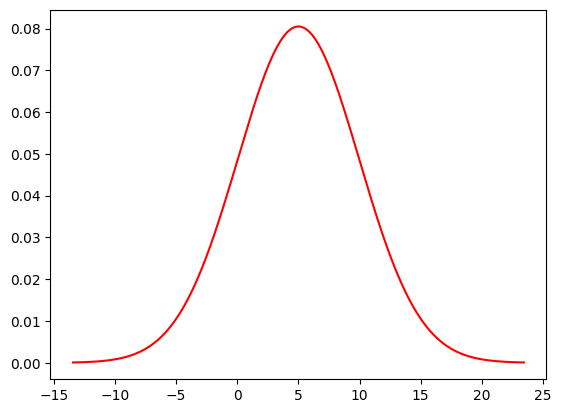

In [47]:
a,b= norm.fit(np.sort(outputs))
g5xtorch= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 4000)
g5distr_torch=norm.pdf(g5xtorch, a,b)
plt.plot(g5xtorch,g5distr_torch,c='r')

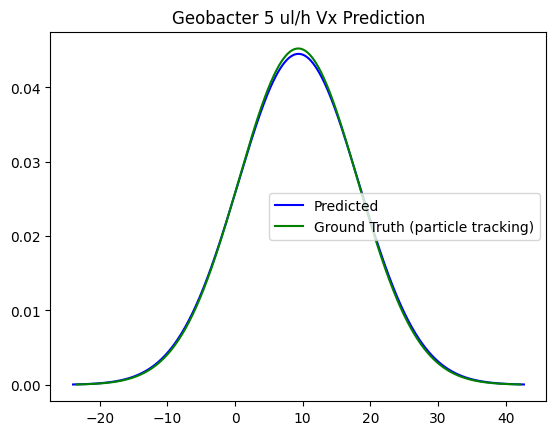

In [126]:
a,b= norm.fit(np.sort(vels))
g5xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 1000)
g5distr_vel=norm.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Geobacter 5 ul/h Vx Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

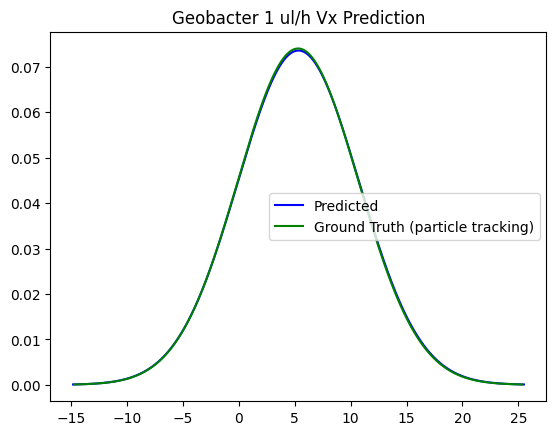

In [147]:
a,b= norm.fit(np.sort(vels))
g5xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 1000)
g5distr_vel=norm.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Geobacter 1 ul/h Vx Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

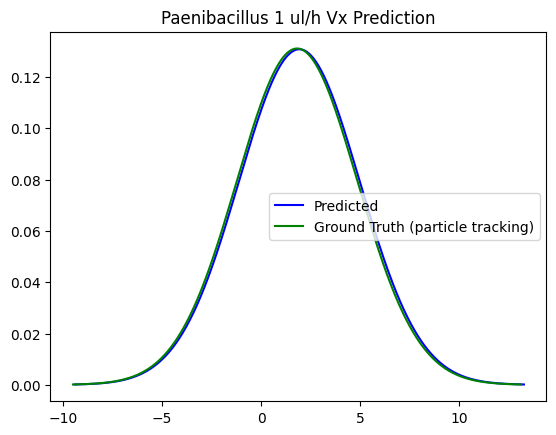

In [131]:
a,b= norm.fit(np.sort(vels))
g5xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 1000)
g5distr_vel=norm.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Paenibacillus 1 ul/h Vx Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

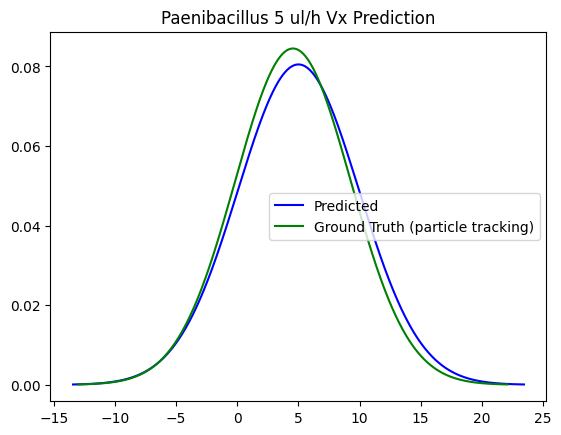

In [48]:
a,b= norm.fit(np.sort(vels))
g5xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 1000)
g5distr_vel=norm.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Paenibacillus 5 ul/h Vx Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

## Vy

In [49]:
model0 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model0.load_state_dict(torch.load('models/vy_model_volod1_384px_disp_all_max69_2162_min-66_9786_v3'))
model0.to(device).eval()

model1 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model1.load_state_dict(torch.load('models/vy_model_volod1_384px_disp_all_max69_2162_min-66_9786_v2'))
model1.to(device).eval()

model2 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model2.load_state_dict(torch.load('models/vy_model_volod1_384px_disp_all_max69_2162_min-66_9786'))
model2.to(device).eval()

model3 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model3.load_state_dict(torch.load('models/vy_model_volod1_224px_disp_all_max69_2162_min-66_9786'))
model3.to(device).eval()

model4 = timm.create_model('volo_d4_448', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model4.load_state_dict(torch.load('models/vy_model_volod4_448px_disp_all_max64_4513_min-66_1406'))
model4.to(device).eval()

model5 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model5.load_state_dict(torch.load('models/vy_model_volod1_384px_disp_all_4_27'))
model5.to(device).eval()

VOLO(
  (patch_embed): PatchEmbed(
    (conv): Sequential(
      (0): Conv2d(40, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (proj): Conv2d(64, 192, kernel_size=(4, 4), stride=(4, 4))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (network): ModuleList(
    (0): Sequential(
      (0): Outlooker(
        (norm1): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
        (attn): OutlookAttention(
          (v): Linear

In [68]:
import torchvision
outputs=[]
outputs2=[]
torch.cuda.empty_cache()
gc.collect()
model0.eval()
model1.eval()
model2.eval()
model3.eval()
model4.eval()
model5.eval()


# print (slope200, slope300, slope500, slope_all)
# print (int200, int300, int500, int_all)
# tensor(182.7808) tensor(182.7808) tensor(184.0055) tensor(216.6908)
# tensor(-16.0141) tensor(-16.0141) tensor(-17.2388) tensor(-49.9241)
max1 = 69.2162
min1 = -66.9786
slope1 = max1-min1
int1 = min1

max2 = 64.4513
min2 = -66.1406
slope2 = max2-min2
int2 = min2

with torch.no_grad():
    for x in test_dataloader:
        x1 = torchvision.transforms.functional.resize(x, 448)
        x2 = torchvision.transforms.functional.resize(x, 384)
        x3 = torchvision.transforms.functional.resize(x, 224)
        out0 = np.sort(model0((x2).to(device)).detach().cpu().numpy())*slope1+int1
        out1 = np.sort(model1((x2).to(device)).detach().cpu().numpy())*slope1+int1
        out2 = np.sort(model2((x2).to(device)).detach().cpu().numpy())*slope1+int1
        out3 = np.sort(model3((x3).to(device)).detach().cpu().numpy())*slope1+int1
        out4 = np.sort(model4((x1).to(device)).detach().cpu().numpy())*slope2+int2
        out4_1 = out4*1.75+2.5
        out4_2 = out4*1.55-3.5
        out4_3 = out4*.75
        out5 = np.sort(model5((x2).to(device)).detach().cpu().numpy())*slope2+int2
        out5_2 = np.sort(model5((x2).to(device)).detach().cpu().numpy())*slope1+int1

        
        ##class1
        if class_num==1:
            out=(out0+out1+out2+out3+out4*30+out5+out5_2+out4_2*22)/58

        if class_num==2:
            out=(out0+out1+out2+out3+out4*30+out5+out5_2+out4_2*24+out4_1*6)/64

        if class_num==3:
            out=(out4*25+out4_2*1+out4_3*6)/32

                ##class3
        #out=(out0*18+out1*4+out4*1+out2*2)/31

        outputs.append(out)
        #outputs2.append(out2)

In [65]:
outputs = np.reshape(np.hstack(outputs),[40000  ,])
class_num

2

In [53]:
directory='../tmate_trajectories/'
filename = os.listdir(directory)[6]
print(filename)
df = pd.read_csv(os.path.join(directory,filename),header=0, skiprows=[1,2,3])
#df.Positio
tracks = df.TRACK_ID.unique()
vels=1
for i in range(len(tracks)):
    idx = tracks[i]
    if df[df.TRACK_ID==idx].sort_values(by='FRAME').FRAME.iloc[-1] < (images.shape[0]*images.shape[1]):
        posy = df[df.TRACK_ID==idx].sort_values(by='FRAME').POSITION_Y
        yvel = calculate_velocity(np.array(posy))
        
        #posx[posx==0]=np.nan
        #posy[posy==0]=np.nan
        #vel = (np.sqrt(posx.diff()**2+posy.diff()**2)/.12).dropna()
    
        vels = np.hstack([vels, yvel])
vels=vels[~np.isnan(vels)]

pean_5ulh_001.csv


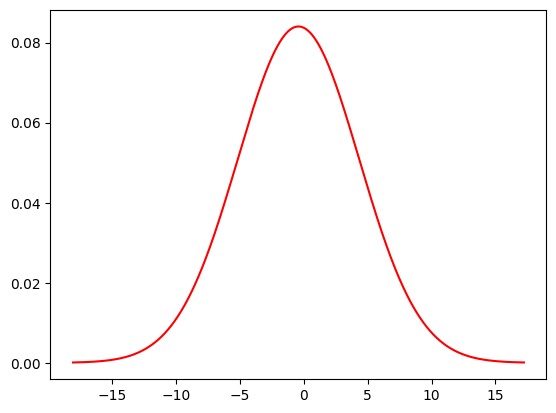

In [69]:
a,b= norm.fit(np.sort(outputs))
g5xtorch= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 4000)
g5distr_torch=norm.pdf(g5xtorch, a,b)
plt.plot(g5xtorch,g5distr_torch,c='r')

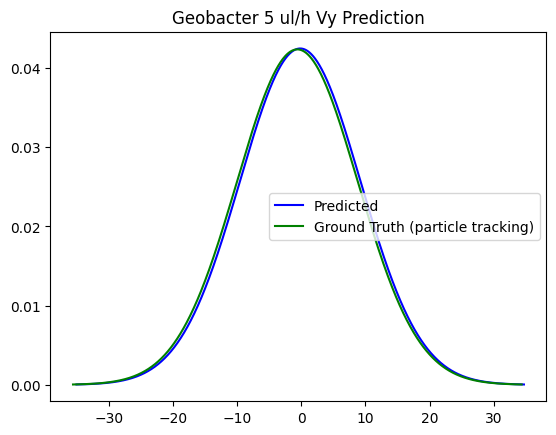

In [161]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm

a,b= norm.fit(np.sort(vels))
g5xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 1000)
g5distr_vel=norm.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Geobacter 5 ul/h Vy Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

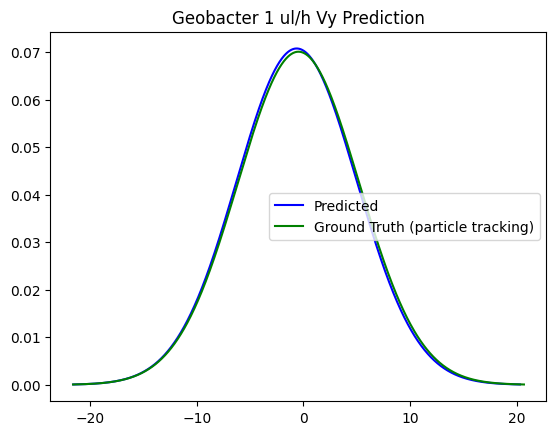

In [180]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm

a,b= norm.fit(np.sort(vels))
g5xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 1000)
g5distr_vel=norm.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Geobacter 1 ul/h Vy Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

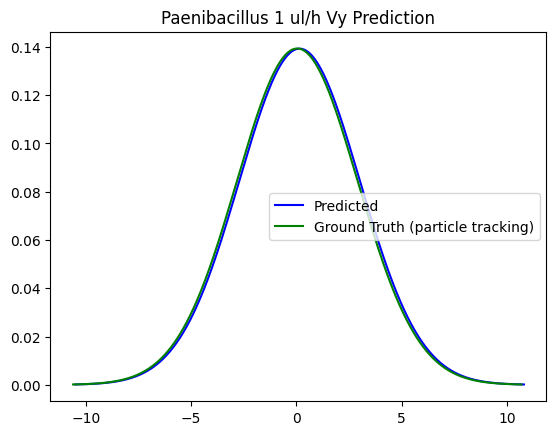

In [190]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm

a,b= norm.fit(np.sort(vels))
g5xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 1000)
g5distr_vel=norm.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Paenibacillus 1 ul/h Vy Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

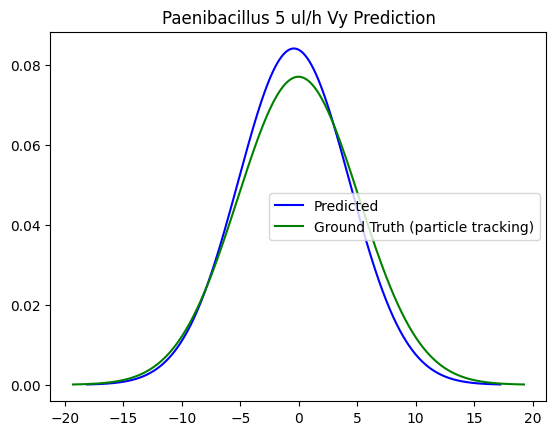

In [70]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm

a,b= norm.fit(np.sort(vels))
g5xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 1000)
g5distr_vel=norm.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Paenibacillus 5 ul/h Vy Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

# MSD

In [71]:
base='all_traj_files/'
target_length=500
def calculate_msd(x_positions, y_positions):
    num_frames = len(x_positions)
    # Initialize an array to store the MSD values
    msd = np.zeros(num_frames)
    # Calculate the displacement for each particle at each frame
    for frame in range(num_frames):
        x_displacements = x_arr[frame] - x_arr[0]
        y_displacements = x_arr[frame] - x_arr[0]
        
        # Calculate the squared displacement for each particle
        squared_displacements = x_displacements**2 + y_displacements**2
        
        # Calculate the MSD for the current frame
        msd[frame] = np.nanmean(squared_displacements)
    
    return msd



In [72]:
model0 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model0.load_state_dict(torch.load('models/MSD_model_volod1_224px_disp_all_4_27'))
model0.to(device).eval()

model1 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model1.load_state_dict(torch.load('models/MSD_model_volod1_384px_disp_all_max_1363419_2'))
model1.to(device).eval()


model2 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model2.load_state_dict(torch.load('models/MSD_model_volod3_448px_disp_all_4_27'))
model2.to(device).eval()

model3 = timm.create_model('volo_d4_448', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model3.load_state_dict(torch.load('models/MSD_model_volod4_448px_disp_all'))
model3.to(device).eval()

model4 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model4.load_state_dict(torch.load('models/MSD_model_volod1_384px_disp_200_v2'))
model4.to(device).eval()

model5 = timm.create_model('volo_d5_448', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model5.load_state_dict(torch.load('models/MSD_model_volod5_448px_disp_500'))
model5.to(device).eval()

model6 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model6.load_state_dict(torch.load('models/MSD_model_volod1_384px_disp_200'))
model6.to(device).eval()


VOLO(
  (patch_embed): PatchEmbed(
    (conv): Sequential(
      (0): Conv2d(40, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (proj): Conv2d(64, 192, kernel_size=(4, 4), stride=(4, 4))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (network): ModuleList(
    (0): Sequential(
      (0): Outlooker(
        (norm1): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
        (attn): OutlookAttention(
          (v): Linear

In [75]:
directory='../tmate_trajectories/'
filename = os.listdir(directory)[6]
print(filename)
df = pd.read_csv(os.path.join(directory,filename),header=0, skiprows=[1,2,3])
#df.Positio
tracks = df.TRACK_ID.unique()
msds=np.zeros([len(tracks),500])
for i in range(len(tracks)):
    idx = tracks[i]
    if df[df.TRACK_ID==idx].sort_values(by='FRAME').FRAME.iloc[-1] < (images.shape[0]*images.shape[1]):
        posy = df[df.TRACK_ID==idx].sort_values(by='FRAME').POSITION_Y
        posx = df[df.TRACK_ID==idx].sort_values(by='FRAME').POSITION_X
        if np.all(posx==0):
            continue
        if np.all(posx==2047.0):
            continue
        else:
            x_arr= np.array(posx)
            y_arr= np.array(posy)
            msd_array = calculate_msd(x_arr,y_arr)
            #msd_array = np.sort(msd_array)
            msd_array=(msd_array[~np.isnan(msd_array)])
            msd_array = msd_array[msd_array>0]
            msd_array = interpolate_vectors(np.sort(msd_array), target_length)
            msds[i,:] = msd_array


pean_5ulh_001.csv


In [185]:
np.all(posx==2047.0)

True

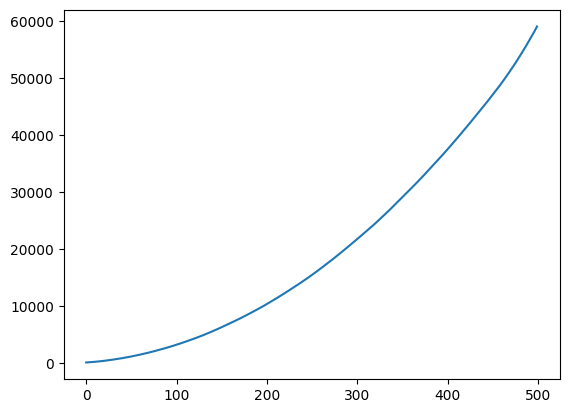

In [76]:
msds.shape
mean_msd = np.mean(msds,0)
plt.plot(mean_msd)

In [77]:
import torchvision
outputs=[]
outputs2=[]
torch.cuda.empty_cache()
gc.collect()
model0.eval()
model1.eval()
model2.eval()
model3.eval()
model4.eval()
model5.eval()
model6.eval()



# print (slope200, slope300, slope500, slope_all)
# print (int200, int300, int500, int_all)
# tensor(182.7808) tensor(182.7808) tensor(184.0055) tensor(216.6908)
# tensor(-16.0141) tensor(-16.0141) tensor(-17.2388) tensor(-49.9241)
max1 = 1360000


with torch.no_grad():
    for x in test_dataloader:
        x1 = torchvision.transforms.functional.resize(x, 448)
        x2 = torchvision.transforms.functional.resize(x, 384)
        x3 = torchvision.transforms.functional.resize(x, 224)
        out0 = (np.sort(model0((x3).to(device)).detach().cpu().numpy())*max1+6000)*1.6
        out1 = np.sort(model1((x2).to(device)).detach().cpu().numpy())*max1+2000
        out2 = np.sort(model2((x1).to(device)).detach().cpu().numpy())*max1
        out3 = (np.sort(model3((x1).to(device)).detach().cpu().numpy())*max1+3000)*.9
        out4 = (np.sort(model4((1-x2).to(device)).detach().cpu().numpy())*max1+2000)*.8
        out5 = (np.sort(model5((1-x1).to(device)).detach().cpu().numpy())*max1+10000)*.3
        out6 = np.sort(model6((1-x2).to(device)).detach().cpu().numpy())*max1+4000


        
        ##class1
        if class_num==1:
            out=(out1*10+out0+out3*2)/13
            out[:,0:250] = (out[:,0:250]+.5*out0[:,0:250])/1.5
            out[:,0:320] = (out[:,0:320]+.25*out3[:,0:320])/1.25

        if class_num==2:
            out=(out0*11+out6*3+out3*2+out1+out2*3)/20
            out[:,0:150] = (out[:,0:150]+1*out0[:,0:150])/2
            out[:,0:250] = (out[:,0:250]+.5*out2[:,0:250])/1.5
            out[:,300:] = (out[:,300:]+.5*out6[:,300:])/1.5
            out[:,400:498] = (out[:,400:498]+.5*out6[:,400:498])/1.5

        ##class3
        if class_num==3:
            out=(out6*17+out3*2+out5*5+out2*3)/27
            out[:,0:150] = (out[:,0:150]+1*out2[:,0:150])/2
            out[:,0:250] = (out[:,0:250]+.5*out5[:,0:250])/1.5
            out[:,95:280] = (out[:,95:280]+.2*out4[:,95:280])/1.2
            out[:,150:380] = (out[:,150:380]+.25*out4[:,150:380])/1.25
            out[:,300:] = (out[:,300:]+.5*out6[:,300:])/1.5
            out[:,400:498] = (out[:,400:498]+.75*out6[:,400:498])/1.75

        ##class4
        #out=(out0*10+out1*14+out9*2)/27

        outputs.append(out)
        #outputs2.append(out2)

In [265]:
mean_out = np.mean(np.vstack(outputs),0)
mean_out[mean_out<0]=20
# mx = np.linspace(1,23,23)
# y = 76*mx+400
# mean_out[1:24] = y
# mean_out[0]=400

In [259]:
mean_out

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 3.20028458e+01, 1.66760303e+02,
       2.97319164e+02, 4.61389736e+02, 5.97375589e+02, 7.68339399e+02,
       9.17121589e+02, 1.02139193e+03, 1.14970102e+03, 1.26587229e+03,
       1.41960012e+03, 1.62166495e+03, 1.76879850e+03, 1.92103003e+03,
       2.17473767e+03, 2.36428200e+03, 2.48803281e+03, 2.57217835e+03,
       2.69411874e+03, 2.81910281e+03, 2.93263280e+03, 3.03743930e+03,
       3.13272111e+03, 3.23174356e+03, 3.33909158e+03, 3.47511891e+03,
      

In [1]:
from scipy.interpolate import splrep, BSpline
x = np.linspace(1, 500, 500)
tck = splrep(x, mean_out, s=2000)
xnew = np.linspace(1, 500, 35)
ynew= BSpline(*tck)(xnew)
plt.plot(xnew, ynew, '-', label='s=20')
#plt.plot(x, mean_out, 'o')
plt.legend()
plt.show()


NameError: name 'np' is not defined

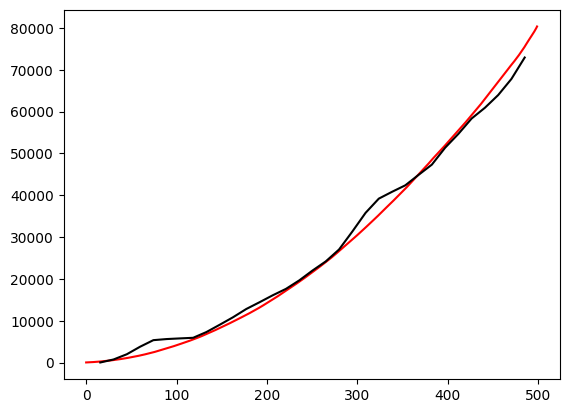

In [268]:
#plt.plot(np.mean(out6,0),c='b')

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w
mean_out2 = moving_average(ynew,3)
plt.plot(mean_msd,c='r')
# plt.plot(smoothed_vector,c='g')
plt.plot(xnew[1:-1],mean_out2,c='k')
# plt.xscale('log')
# plt.yscale('log')

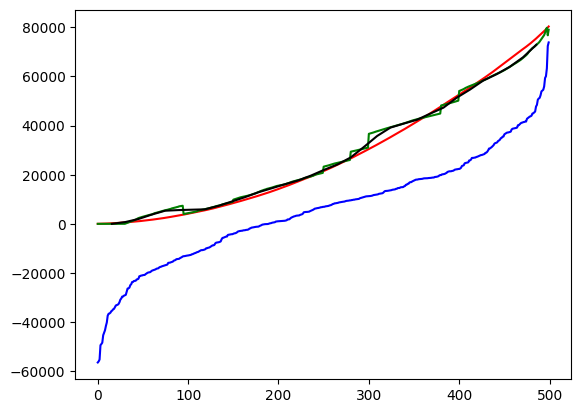

In [269]:
plt.plot(np.mean(out4,0),c='b')
plt.plot(mean_msd,c='r')
plt.plot(mean_out,c='g')
plt.plot(xnew[1:-1],mean_out2,c='k')
# plt.xscale('log')
# plt.yscale('log')

In [135]:
(mean_out[20])-(mean_out[0])/(19)

1520.1924860168558

In [132]:
np.mean(np.vstack(outputs),0)

array([-5.82775822e+03, -3.51028942e+03, -2.66289396e+03, -2.00232872e+03,
       -1.53835326e+03, -1.18687843e+03, -8.59373126e+02, -5.90408427e+02,
       -3.69520216e+02, -1.24821418e+02,  6.58182387e+01,  2.43547056e+02,
        4.04251694e+02,  5.76737054e+02,  7.18200278e+02,  8.56175780e+02,
        9.92279292e+02,  1.14145696e+03,  1.28694963e+03,  1.42685481e+03,
        1.54821488e+03,  1.65428590e+03,  1.77051460e+03,  1.89429167e+03,
        2.01173083e+03,  2.12934688e+03,  2.23925543e+03,  2.35256551e+03,
        2.48024007e+03,  2.59821736e+03,  2.72113813e+03,  2.83678684e+03,
        2.95169535e+03,  3.06149882e+03,  3.18033710e+03,  3.31354111e+03,
        3.46110835e+03,  3.57546793e+03,  3.73099413e+03,  3.84771416e+03,
        3.95828905e+03,  4.08057260e+03,  4.18984210e+03,  4.31714265e+03,
        4.42709421e+03,  4.54837449e+03,  4.66058321e+03,  4.77263838e+03,
        4.87383597e+03,  4.97945113e+03,  5.09649194e+03,  5.21678872e+03,
        5.34855714e+03,  

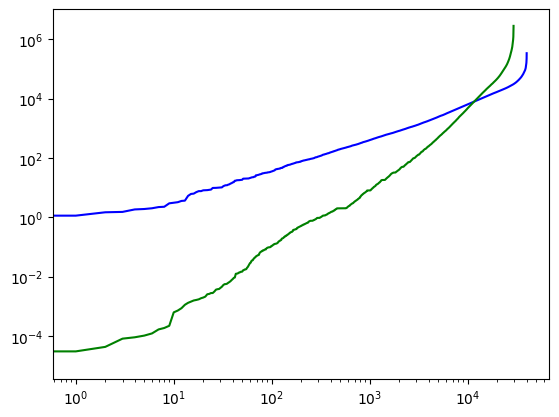

In [226]:
outputs2 = interpolate_vectors(outputs, len(msds))
plt.plot(np.sort(outputs), c='b')
plt.plot(np.sort(msds), c='g')
plt.xscale('log')
plt.yscale('log')

In [227]:
len(msds)

29386

In [201]:
outputs

array([-17439.092, -13038.38 , -12494.351, ..., 346081.03 , 346607.56 ,
       346771.62 ], dtype=float32)